In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
from scipy.stats import linregress
warnings.filterwarnings("ignore", category=FutureWarning)

# Metric Profiles

In the following sections, I will present the metrics implemented in the tool. 

Each metric section will begin with a summary about that metric and how it works. We will then look at how each metric reacts to specific alterations to the altered model, and finally compare the metrics head to head.

### Tool alterations:

**- add_activity:** Add an activity to the process model.

**- add_flow:** Add a flow to the process model.

**- add_gateway:** Add a gateway to the process model.

**- remove_activity:** Remove an activity from the process model.

**- remove_flow:** Remove a flow from the process model.

**- remove_gateway:** Remove a gateway from the process model.

**- remove_flowNode:** Remove a flow node from the process model.

**- change_label:** Change the label of a node in the process model.


-----

### 2.0 Testing Methodology

For testing, I used the following model:

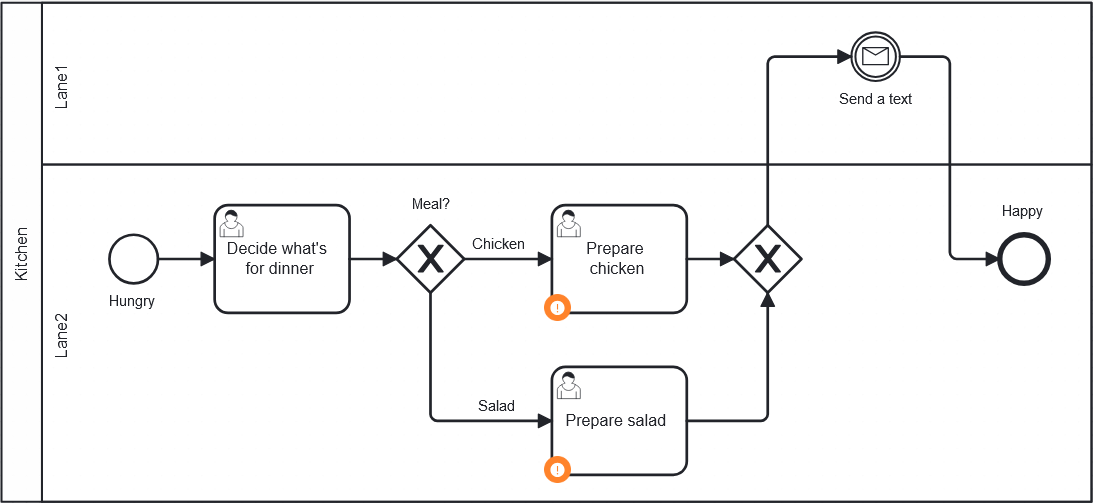

- The alteration is first applied to one randomly selected node in the reference process model.
- This altered model is then evaluated for similarity against the original reference model.
- This process is repeated 25 times to account for randomness and variability in results.
- The same alteration is then applied to two randomly selected nodes in the reference model, following the same procedure (repeating 25 times).
- This pattern continues, increasing the number of altered nodes gradually, until all 8 nodes of the reference model are altered.

-----

### 1.0 Causal Footprint Metric [Dijkman10]


- **Node Matching Similarity** – This metric compares the labels and attributes of process model elements. It uses equivalence mapping based on syntactic similarity, semantic similarity, type and contextual similarity.

- **Structural Similarity** – This considers both the labels and the topology (graph structure) of the process model. "Graph-edit distance" (including substitutions, node deletion, etc.) are used for the comparison. (gateways not considered in computation)

- **Behavioral Similarity** – This metric accounts for "causal relations" (look-back and look-ahead links) between tasks in the process model, considering indirect relationships as well.

### 3.1 Metric Sensitivity

To analyze the plots I will follow the following structure:

1. Overall Trend

    - Monotonicity: Do all metrics decrease as alteration count increases?
    - Convergence: Do all metrics eventually approach zero (or near zero)?

2. Relative Slopes & Ordering

    - Which metric is steepest?
    - Does one metric remain higher than the others throughout? Or do the lines cross at some point?

3. Key Crossovers or “Elbows”

    - Intersection Points: Where do any of the lines intersect?
    - Notable “Elbows” or big drops

4. Spread / Variance

    - Confidence Intervals (Shaded Regions)


In [10]:
df_remove_activity = pd.read_csv("C:/Users/HP/OneDrive/Documents/Projects/metrics_implementation/tool/csv/test_remove_flowNode_new.csv")
df_remove_gateway = pd.read_csv("C:/Users/HP/OneDrive/Documents/Projects/metrics_implementation/tool/csv/test_remove_gateway_new.csv")
df_remove_flow = pd.read_csv("C:/Users/HP/OneDrive/Documents/Projects/metrics_implementation/tool/csv/test_remove_flow_new.csv")
df_add_activity = pd.read_csv("C:/Users/HP/OneDrive/Documents/Projects/metrics_implementation/tool/csv/test_add_activity_new.csv")
df_add_flow = pd.read_csv("C:/Users/HP/OneDrive/Documents/Projects/metrics_implementation/tool/csv/test_add_flow_new.csv")
df_change_label = pd.read_csv("C:/Users/HP/OneDrive/Documents/Projects/metrics_implementation/tool/csv/test_change_label_new_lg.csv")

### 3.1.1 Remove Activity

Alteration Count  Repetition  Alteration Type  Node Similarity  \
0                 1           1  remove_activity         1.001420   
1                 1           2  remove_activity         1.001420   
2                 1           3  remove_activity         0.866645   
3                 1           4  remove_activity         0.868294   
4                 1           5  remove_activity         0.866645   

   Structural Similarity  Behavioral Similarity  Precision  Recall  F1-Score  \
0               0.510431               0.935112   0.928571  0.8125  0.866667   
1               0.510431               0.935112   0.928571  0.8125  0.866667   
2               0.818182               0.999612   0.928571  0.8125  0.866667   
3               0.652979               0.989910   1.000000  0.8750  0.933333   
4               0.534549               0.989604   0.928571  0.8125  0.866667   

   Compliance Degree  Compliance Maturity  
0                0.9                  0.9  
1                0.9                  0.9  
2                1.0                  0.8  
3                0.0                  0.0  
4                1.0                  0.8

<Figure size 1000x600 with 0 Axes>

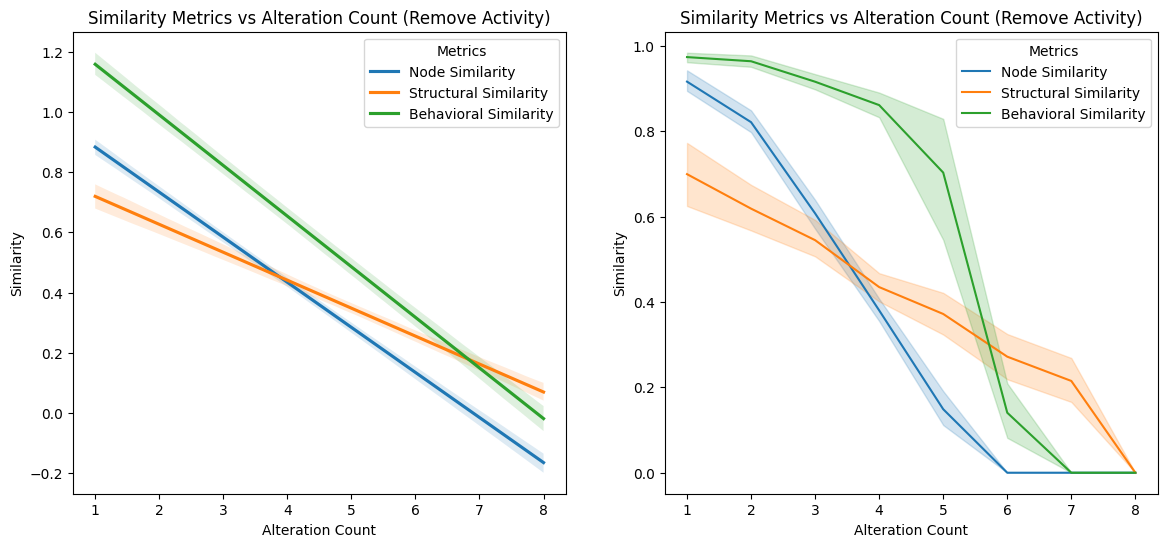

In [11]:
plt.figure(figsize=(10,6))


columns_to_plot = ["Node Similarity", "Structural Similarity", "Behavioral Similarity"]

fig, axes = plt.subplots(1,2, figsize=(14,6))

for col in columns_to_plot:
    sns.regplot(data=df_remove_activity, x= "Alteration Count", y= col, label=col, scatter=False, order=1, ax=axes[0])
axes[0].legend(title="Metrics")
axes[0].set_xlabel("Alteration Count")
axes[0].set_ylabel("Similarity")
axes[0].set_title("Similarity Metrics vs Alteration Count (Remove Activity)")


for col in columns_to_plot:
    sns.lineplot(data=df_remove_activity, x= "Alteration Count", y= col, label=col, ax=axes[1])
axes[1].legend(title="Metrics")
axes[1].set_xlabel("Alteration Count")
axes[1].set_ylabel("Similarity")
axes[1].set_title("Similarity Metrics vs Alteration Count (Remove Activity)")


df_remove_activity.head()


<Axes: xlabel='Alteration Count', ylabel='Behavioral Similarity'>

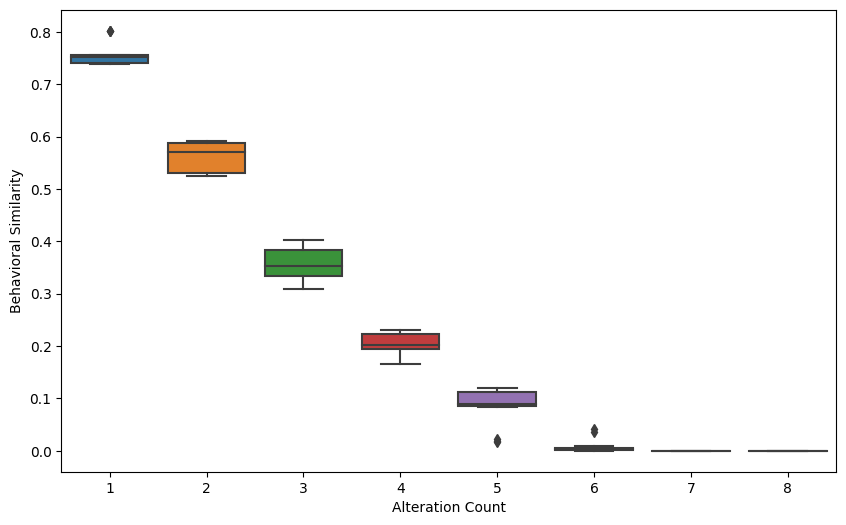

In [4]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df_remove_activity, x="Alteration Count", y="Behavioral Similarity")

In [16]:
dfs = {
    "remove_activity": df_remove_activity,
    "remove_flow": df_remove_flow,
    "remove_gateway": df_remove_gateway,
    "change_label": df_change_label,
    "add_activity": df_add_activity,
    "add_flow": df_add_flow
}

metrics = ["Node Similarity", "Structural Similarity", "Behavioral Similarity", 
           "F1-Score", "Compliance Degree", "Compliance Maturity"]


columns = ["Alteration Type"]
for metric in metrics:
    columns.extend([f"{metric} Slope", f"{metric} Intercept", f"{metric} r_value", f"{metric} p_value", f"{metric} std_err"])


correlation_df = pd.DataFrame(columns=columns)

for alteration_type, df in dfs.items():
    row = [alteration_type] 

    for metric in metrics:
        slope, intercept, r_value, p_value, std_err = linregress(df["Alteration Count"], df[metric])
        row.extend([slope, intercept, r_value, p_value, std_err]) 

    correlation_df.loc[len(correlation_df)] = row 
    
correlation_df

Alteration Type  Node Similarity Slope  Node Similarity Intercept  \
0  remove_activity              -0.149699                   1.032943   
1      remove_flow              -0.133196                   0.950811   
2   remove_gateway              -0.095282                   0.966500   
3     change_label              -0.021860                   0.905183   
4     add_activity              -0.068878                   0.922893   
5         add_flow              -0.006464                   0.956423   

   Node Similarity r_value  Node Similarity p_value  Node Similarity std_err  \
0                -0.947162            9.979881e-100                 0.003603   
1                -0.945338             2.619508e-98                 0.003265   
2                -1.000000             0.000000e+00                 0.000000   
3                -0.607530             1.298862e-26                 0.001815   
4                -0.941602             1.514468e-95                 0.001750   
5                -0.584199             1.079601e-19                 0.000638   

   Structural Similarity Slope  Structural Similarity Intercept  \
0                    -0.092822                         0.812302   
1                    -0.043644                         0.995283   
2                     0.000000                         1.000000   
3                    -0.016650                         0.910543   
4                    -0.019321                         0.911868   
5                    -0.012200                         0.987364   

   Structural Similarity r_value  Structural Similarity p_value  ...  \
0                      -0.851506                   2.024203e-57  ...   
1                      -0.944382                   1.390231e-97  ...   
2                       0.000000                   1.000000e+00  ...   
3                      -0.390383                   1.582576e-10  ...   
4                      -0.912566                   7.917626e-79  ...   
5                      -0.784879                   5.032540e-43  ...   

   Compliance Degree Slope  Compliance Degree Intercept  \
0                -0.103123                     0.685012   
1                -0.046667                     0.280000   
2                 0.000000                     1.000000   
3                -0.062352                     0.874933   
4                -0.062118                     0.784557   
5                -0.064235                     0.800391   

   Compliance Degree r_value  Compliance Degree p_value  \
0                  -0.604639               2.527172e-21   
1                  -0.419079               6.566641e-10   
2                   0.000000               1.000000e+00   
3                  -0.764370               3.576477e-49   
4                  -0.843425               2.515579e-55   
5                  -0.830319               3.602941e-52   

   Compliance Degree std_err  Compliance Maturity Slope  \
0                   0.009654                  -0.092429   
1                   0.007185                  -0.046667   
2                   0.000000                   0.000000   
3                   0.003340                  -0.062352   
4                   0.002812                  -0.014190   
5                   0.003064                  -0.013857   

   Compliance Maturity Intercept  Compliance Maturity r_value  \
0                       0.604429                    -0.621493   
1                       0.280000                    -0.419079   
2                       1.000000                     0.000000   
3                       0.874933                    -0.764370   
4                       0.968857                    -0.258059   
5                       0.973857                    -0.256540   

   Compliance Maturity p_value  Compliance Maturity std_err  
0                 9.270535e-23                     0.008280  
1                 6.566641e-10                     0.007185  
2                 1.000000e+00                     0.000000  
3               

In [13]:
p_value_df = correlation_df.filter(like="p_value", axis=1).copy()
p_value_df.insert(0, "Alteration Type", correlation_df["Alteration Type"])

# Rename columns for readability
p_value_df.rename(columns={
    "Node Similarity p_value": "Node Sim.",
    "Structural Similarity p_value": "Struct. Sim.",
    "Behavioral Similarity p_value": "Behav. Sim.",
    "F1-Score p_value": "F1 Sim.",
    "Compliance Degree p_value": "Comp. Deg.",
    "Compliance Maturity p_value": "Comp. Mat."
}, inplace=True)


def format_sci_notation(x):
    if x == 0:
        return "$0$"  
    elif np.abs(x) < 1e-3: 
        exponent = int(np.floor(np.log10(abs(x))))
        coefficient = x / (10 ** exponent)
        return f"${coefficient:.2f} \\times 10^{{{exponent}}}$"
    else:  
        return f"${x:.3f}$"


p_value_df.iloc[:, 1:] = p_value_df.iloc[:, 1:].applymap(format_sci_notation)


latex_p_value = p_value_df.to_latex(index=False, escape=False, 
                                    column_format="lcccccc",
                                    caption="P-Values for Different Alterations",
                                    label="tab:pvalues")


with open("pvalues_table.tex", "w") as f:
    f.write(latex_p_value)


p_value_df


Alteration Type                Node Sim.            Struct. Sim.  \
0  remove_activity  $9.98 \times 10^{-100}$  $2.02 \times 10^{-57}$   
1      remove_flow   $2.62 \times 10^{-98}$  $1.39 \times 10^{-97}$   
2   remove_gateway                      $0$                 $1.000$   
3     change_label   $1.30 \times 10^{-26}$  $1.58 \times 10^{-10}$   
4     add_activity   $1.51 \times 10^{-95}$  $7.92 \times 10^{-79}$   
5         add_flow   $1.08 \times 10^{-19}$  $5.03 \times 10^{-43}$   

              Behav. Sim.                  F1 Sim.              Comp. Deg.  \
0  $3.95 \times 10^{-66}$  $2.65 \times 10^{-140}$  $2.53 \times 10^{-21}$   
1  $3.22 \times 10^{-42}$  $5.60 \times 10^{-227}$  $6.57 \times 10^{-10}$   
2  $5.11 \times 10^{-14}$                      $0$                 $1.000$   
3  $4.89 \times 10^{-13}$   $8.22 \times 10^{-37}$  $3.58 \times 10^{-49}$   
4  $2.99 \times 10^{-27}$  $6.32 \times 10^{-175}$  $2.52 \times 10^{-55}$   
5  $6.24 \times 10^{-21}$  $1.73 \times 10^{-251}$  $3.60 \times 10^{-52}$   

               Comp. Mat.  
0  $9.27 \times 10^{-23}$  
1  $6.57 \times 10^{-10}$  
2                 $1.000$  
3  $3.58 \times 10^{-49}$  
4   $2.25 \times 10^{-4}$  
5   $2.46 \times 10^{-4}$

In [17]:
r_value_df = correlation_df.filter(like="r_value", axis=1)
r_value_df.insert(0, "Alteration Type", correlation_df["Alteration Type"])  # Keep the Alteration Type column

r_value_df.rename(columns={
    "Node Similarity r_value": "Node Sim.",
    "Structural Similarity r_value": "Struct. Sim.",
    "Behavioral Similarity r_value": "Behav. Sim.",
    "F1-Score r_value": "F1 Sim.",
    "Compliance Degree r_value": "Comp. Deg.",
    "Compliance Maturity r_value": "Comp. Mat."
}, inplace=True)

r_value_df=r_value_df.round(3)
latex_r_value = r_value_df.to_latex(index=False,caption="R-Values",label="tab:rvalues")

with open("rvalues_table.tex", "w") as f:
    f.write(latex_r_value)

C:\Users\HP\AppData\Local\Temp\ipykernel_15924\4130788034.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r_value_df.rename(columns={


In [18]:
slope_df = correlation_df.filter(like="Slope", axis=1)
slope_df.insert(0, "Alteration Type", correlation_df["Alteration Type"])  # Keep the Alteration Type column

slope_df.rename(columns={
    "Node Similarity Slope": "Node Sim.",
    "Structural Similarity Slope": "Struct. Sim.",
    "Behavioral Similarity Slope": "Behav. Sim.",
    "F1-Score Slope": "F1 Score",
    "Compliance Degree Slope": "Compl. Degree",
    "Compliance Maturity Slope": "Compl. Maturity"
}, inplace=True)

slope_df=slope_df.round(3)
latex_slope_df = slope_df.to_latex(index=False,caption="Slope Values",label="tab:slope")

with open("slope_table.tex", "w") as f:
    f.write(latex_slope_df)
    
slope_df

C:\Users\HP\AppData\Local\Temp\ipykernel_15924\2712975784.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  slope_df.rename(columns={


Alteration Type  Node Sim.  Struct. Sim.  Behav. Sim.  F1 Score  \
0  remove_activity     -0.150        -0.093       -0.168    -0.123   
1      remove_flow     -0.133        -0.044       -0.138    -0.043   
2   remove_gateway     -0.095         0.000       -0.006    -0.229   
3     change_label     -0.022        -0.017       -0.000    -0.047   
4     add_activity     -0.069        -0.019       -0.002    -0.048   
5         add_flow     -0.006        -0.012       -0.001    -0.024   

   Compl. Degree  Compl. Maturity  
0         -0.103           -0.092  
1         -0.047           -0.047  
2          0.000            0.000  
3         -0.062           -0.062  
4         -0.062           -0.014  
5         -0.064           -0.014

In [19]:
intercept_df = correlation_df.filter(like="Intercept", axis=1)
intercept_df.insert(0, "Alteration Type", correlation_df["Alteration Type"])  # Keep the Alteration Type column

intercept_df.rename(columns={
    "Node Similarity Intercept": "Node Sim.",
    "Structural Similarity Intercept": "Struct. Sim.",
    "Behavioral Similarity Intercept": "Behav. Sim.",
    "F1-Score Intercept": "F1 Score",
    "Compliance Degree Intercept": "Compl. Degree",
    "Compliance Maturity Intercept": "Compl. Maturity"
}, inplace=True)

intercept_df=intercept_df.round(3)
latex_intercept_df = intercept_df.to_latex(index=False,caption="intercept Values",label="tab:intercept")

with open("intercept_table.tex", "w") as f:
    f.write(latex_intercept_df)
    
intercept_df

C:\Users\HP\AppData\Local\Temp\ipykernel_15924\1029283459.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  intercept_df.rename(columns={


Alteration Type  Node Sim.  Struct. Sim.  Behav. Sim.  F1 Score  \
0  remove_activity      1.033         0.812        1.326     0.982   
1      remove_flow      0.951         0.995        1.337     1.021   
2   remove_gateway      0.967         1.000        1.004     1.029   
3     change_label      0.905         0.911        1.000     0.822   
4     add_activity      0.923         0.912        0.999     0.938   
5         add_flow      0.956         0.987        1.000     0.989   

   Compl. Degree  Compl. Maturity  
0          0.685            0.604  
1          0.280            0.280  
2          1.000            1.000  
3          0.875            0.875  
4          0.785            0.969  
5          0.800            0.974

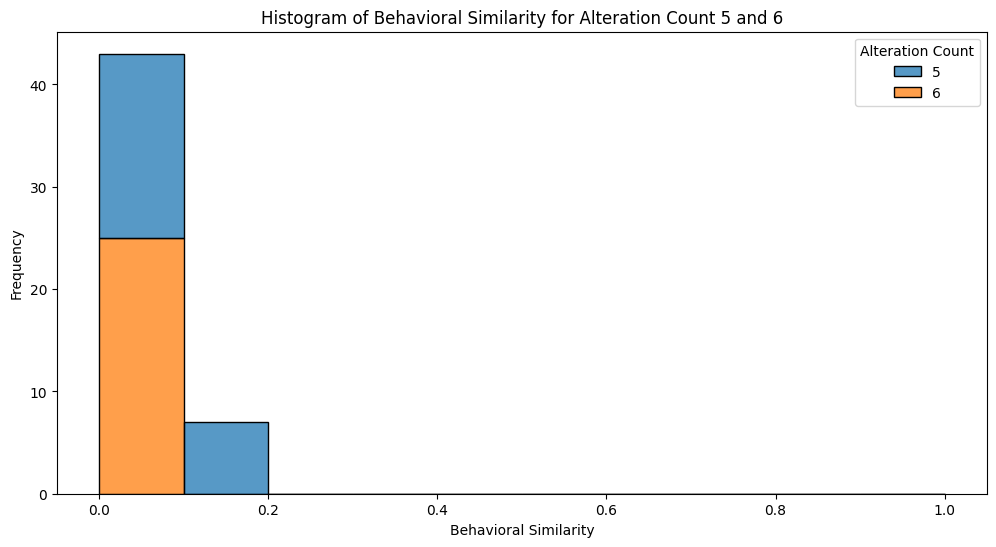

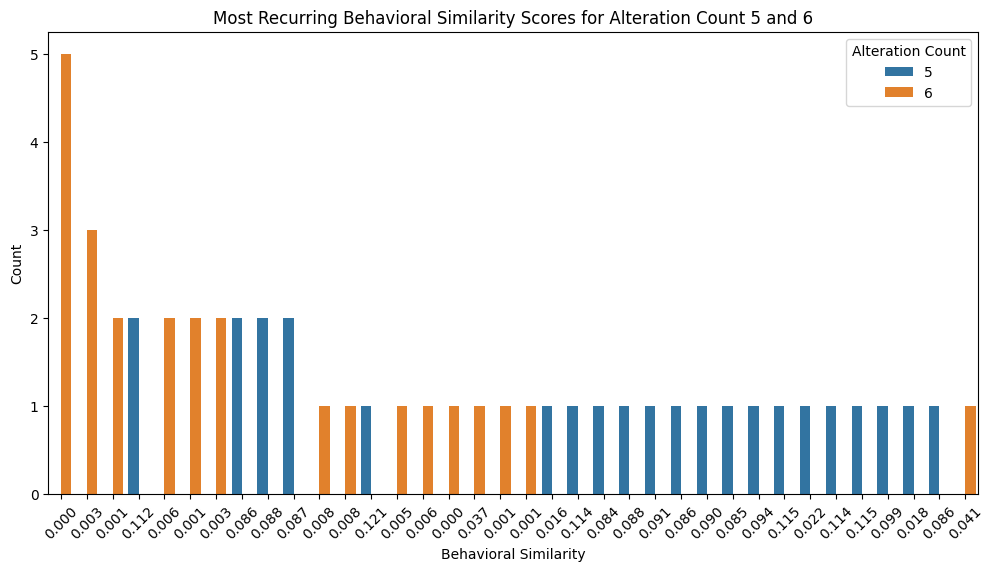

In [10]:

df_filtered = df_remove_activity[df_remove_activity["Alteration Count"].isin([5, 6])]

bins = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]


plt.figure(figsize=(12, 6))
sns.histplot(data=df_filtered, x="Behavioral Similarity", hue="Alteration Count", bins=bins, kde=False, multiple="stack",palette="tab10"  )
plt.xlabel("Behavioral Similarity")
plt.ylabel("Frequency")
plt.title("Histogram of Behavioral Similarity for Alteration Count 5 and 6")
# plt.legend(title="Alteration Count")
plt.show()



plt.figure(figsize=(12, 6))
ax = sns.countplot(
    data=df_filtered,
    x="Behavioral Similarity",
    hue="Alteration Count",
    order=df_filtered["Behavioral Similarity"].value_counts().index
)

plt.xlabel("Behavioral Similarity")
plt.ylabel("Count")
plt.title("Most Recurring Behavioral Similarity Scores for Alteration Count 5 and 6")

# Round x-tick labels to 3 decimal places
ax.set_xticklabels([f"{float(tick.get_text()):.3f}" for tick in ax.get_xticklabels()], rotation=45)

plt.legend(title="Alteration Count")
plt.show()





In [11]:
df = pd.read_csv("C:/Users/HP/OneDrive/Documents/Projects/metrics_implementation/tool/csv/behavioral_comparison.csv")
df.head()

Alteration Count  Repetition  Behavioral Similarity1  \
0                 1           1                0.935112   
1                 1           2                0.935112   
2                 1           3                0.999612   
3                 1           4                0.989910   
4                 1           5                0.989604   

   Behavioral Similarity2  Behavioral Similarity3  Behavioral Similarity4  \
0                0.993299                0.999539                0.801798   
1                0.999613                0.989604                0.802478   
2                0.989910                0.989604                0.801798   
3                0.999539                0.989910                0.738663   
4                0.989604                0.935112                0.751597   

       Diff  
0  0.000560  
1  0.064427  
2  0.000001  
3  0.009629  
4  0.010009

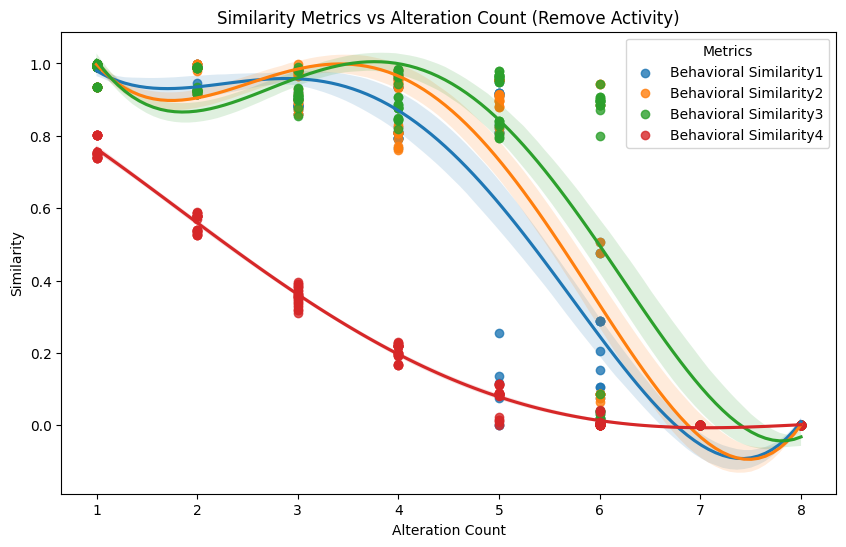

In [12]:
plt.figure(figsize=(10,6))
plt.title("Similarity Metrics vs Alteration Count (Remove Activity)")

columns_to_plot = ["Behavioral Similarity1", "Behavioral Similarity2", "Behavioral Similarity3", "Behavioral Similarity4"]

for col in columns_to_plot:
    # sns.scatterplot(data=df, x="Alteration Count", y=col, label=col)  
    sns.regplot(data=df, x= "Alteration Count", y= col, label=col, scatter=True, order=4)

plt.legend(title="Metrics")


plt.xlabel("Alteration Count")
plt.ylabel("Similarity");

C:\Users\HP\AppData\Local\Temp\ipykernel_16012\4261104052.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


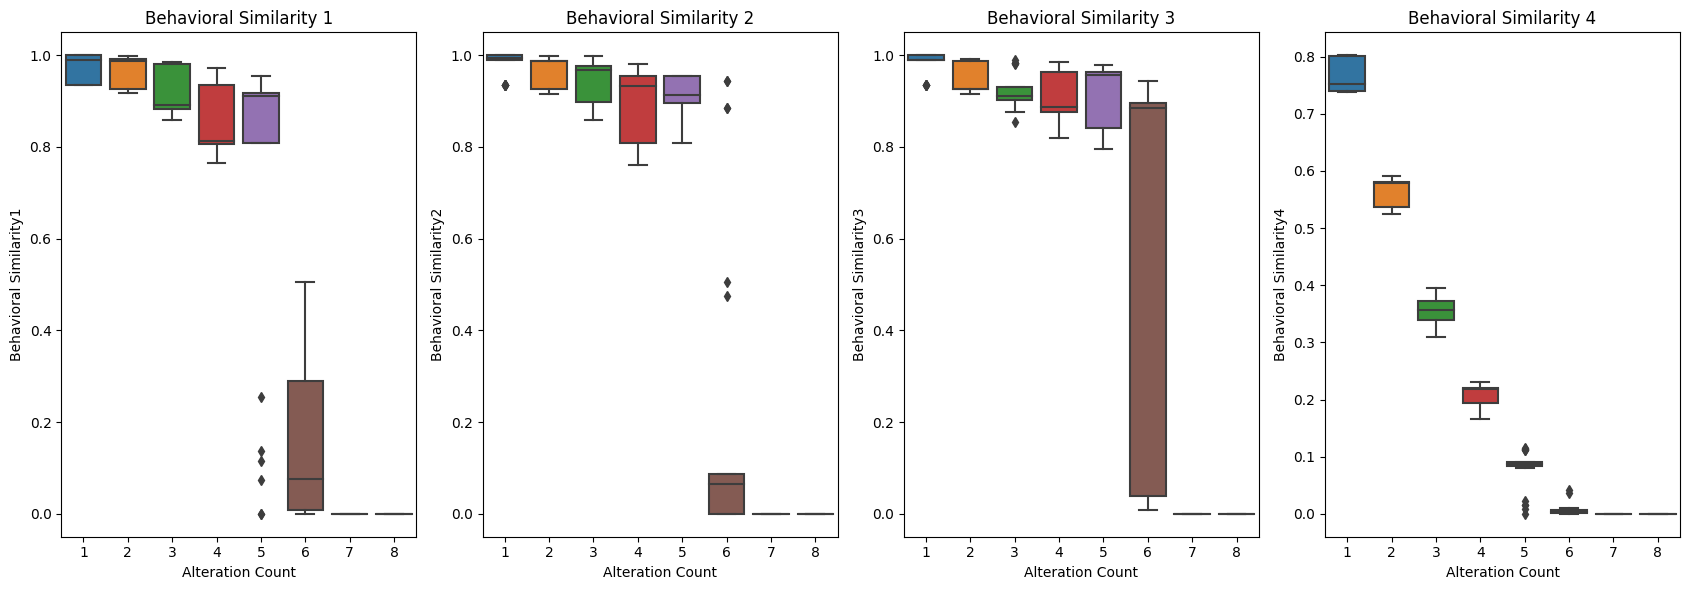

In [13]:
fig, axes = plt.subplots(1, 4, figsize=(17,6))

sns.boxplot(data=df, x="Alteration Count", y="Behavioral Similarity1", ax= axes[0])
axes[0].set_title("Behavioral Similarity 1")

sns.boxplot(data=df, x="Alteration Count", y="Behavioral Similarity2", ax= axes[1])
axes[1].set_title("Behavioral Similarity 2")

sns.boxplot(data=df, x="Alteration Count", y="Behavioral Similarity3", ax= axes[2])
axes[2].set_title("Behavioral Similarity 3")

sns.boxplot(data=df, x="Alteration Count", y="Behavioral Similarity4", ax= axes[3])
axes[3].set_title("Behavioral Similarity 4")

# sns.boxplot(data=df, x="Alteration Count", y="Behavioral Similarity5", ax= axes[4])
# axes[4].set_title("Behavioral Similarity 5 (big model)")

fig.tight_layout()
fig.show()

In [14]:
df_remove_activity_absence = pd.read_csv("C:/Users/HP/OneDrive/Documents/Projects/metrics_implementation/tool/csv/test_remove_activity_absence.csv")
# df_remove_activity_absence

Text(0.5, 1.0, 'Similarity Metrics vs Alteration Count (Remove Activity)')

<Figure size 1000x600 with 0 Axes>

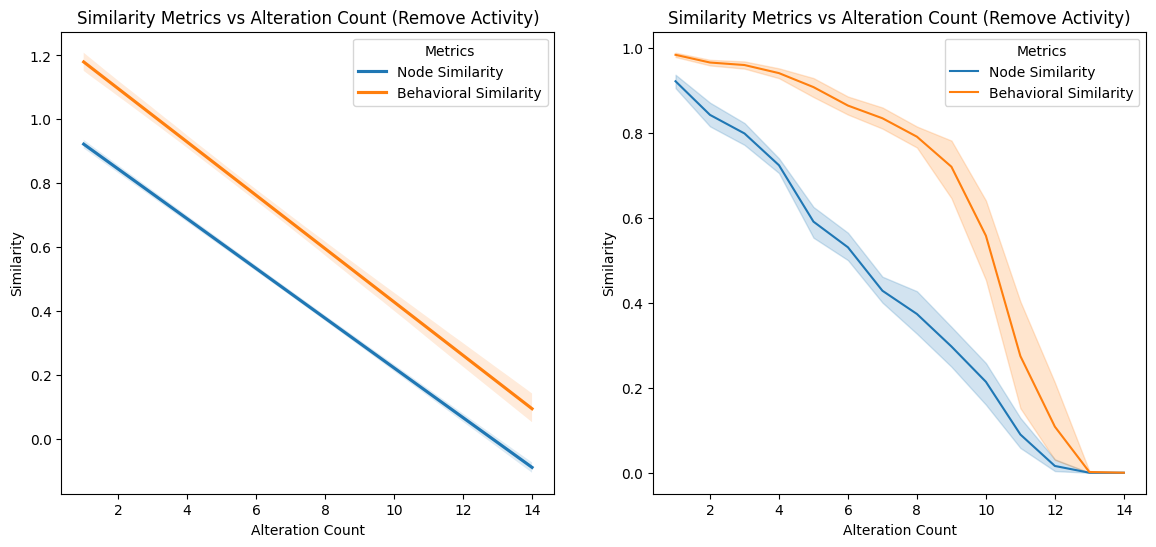

In [15]:
plt.figure(figsize=(10,6))


columns_to_plot = ["Node Similarity", "Behavioral Similarity"]

fig, axes = plt.subplots(1,2, figsize=(14,6))

for col in columns_to_plot:
    sns.regplot(data=df_remove_activity_absence, x= "Alteration Count", y= col, label=col, scatter=False, order=1, ax=axes[0])
axes[0].legend(title="Metrics")
axes[0].set_xlabel("Alteration Count")
axes[0].set_ylabel("Similarity")
axes[0].set_title("Similarity Metrics vs Alteration Count (Remove Activity)")


for col in columns_to_plot:
    sns.lineplot(data=df_remove_activity_absence, x= "Alteration Count", y= col, label=col, ax=axes[1])
axes[1].legend(title="Metrics")
axes[1].set_xlabel("Alteration Count")
axes[1].set_ylabel("Similarity")
axes[1].set_title("Similarity Metrics vs Alteration Count (Remove Activity)")





<Axes: xlabel='Alteration Count', ylabel='Behavioral Similarity'>

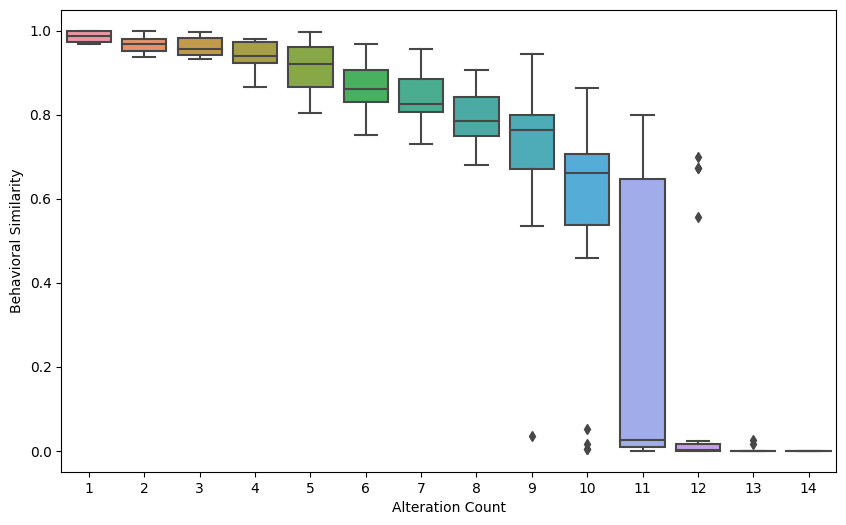

In [16]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df_remove_activity_absence, x="Alteration Count", y="Behavioral Similarity")

1. Overall Trend

    - All three metric values descrease as the number of alterations increase and converge to zero (expected)

2. Relative Slopes & Ordering

    - In our case, Node Similarity drops the fastest, and by that being the most sensitive to removing flow nodes.
    
    - Behavioral similarity stays higher than structural similarity until the 6th-7th alteration, then converges to zero. The reason for that is because we do not consider gateways in computation. First, gateways are removed -> edges added between predecessors and successors -> according to which flowNodes are left in the altered model, this could lead to less graph-edit operations -> higher structural similarity.

    #### **-> find example in log**

3. Key Crossovers or “Elbows”

    - Node similarity at 6 alterations. Reason: due to massive changes in the inputs / outputs of the nodes, the node similarity will not exceed the threshold of 0.80, due to low contextual similarity. 
    
    - Example: (altered model only has the nodes "decide-dinner" and "send_text_event"):
        - Node1: decide-dinner, Node2: decide-dinner
        - Syntactic Similarity: 1.0
        - Semantic Similarity: 1.0
        - Label Similarity: 1.0
        - Type Similarity: 1.0
        - *Contextual Similarity: 0.20412414523193154*
    - **Combined Similarity: 0.7347080484106439**

4. Spread / Variance

    - Behavioral similarity has high variance at 5-6 alterations:
        - if the remaining nodes are matched (threshold >= 0.8)
        - are directly connected (original flows) and are part of shorter look-back / look-ahead links
        
        they will result in a high similarity value in their index vectors.
        
       Example:

       FlowNodes altered model:
            
            flowNode(id=happy-end, label=Happy, type=endEvent, lane_id=Lane2)
            
            flowNode(id=send_text_event, label=Send a text, type=intermediateCatchEvent, lane_id=Lane1)

            Flows:
            Flow(id=Flow_0pulpzo, label=, source=send_text_event, target=happy-end)


    

            



-----

### 3.1.2 Remove Flow

Text(0.5, 1.0, 'Similarity Metrics vs Alteration Count (Remove Flow)')

<Figure size 1000x600 with 0 Axes>

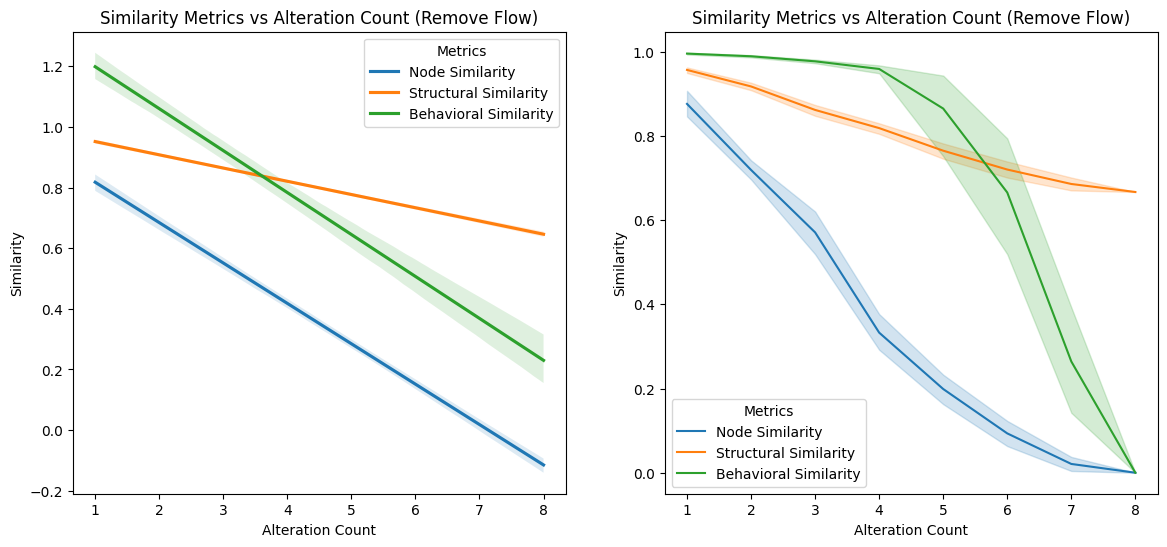

In [17]:
plt.figure(figsize=(10,6))


columns_to_plot = ["Node Similarity", "Structural Similarity", "Behavioral Similarity"]

fig, axes = plt.subplots(1,2, figsize=(14,6))

for col in columns_to_plot:
    sns.regplot(data=df_remove_flow, x= "Alteration Count", y= col, label=col, scatter=False, order=1, ax=axes[0])
axes[0].legend(title="Metrics")
axes[0].set_xlabel("Alteration Count")
axes[0].set_ylabel("Similarity")
axes[0].set_title("Similarity Metrics vs Alteration Count (Remove Flow)")


for col in columns_to_plot:
    sns.lineplot(data=df_remove_flow, x= "Alteration Count", y= col, label=col, ax=axes[1])
axes[1].legend(title="Metrics")
axes[1].set_xlabel("Alteration Count")
axes[1].set_ylabel("Similarity")
axes[1].set_title("Similarity Metrics vs Alteration Count (Remove Flow)")


1. Overall Trend

    - Monotonicity: Do all metrics decrease as alteration count increases? 
        
        - Yes (expected)
    
    - Convergence: Do all metrics eventually approach zero (or near zero)? 
        
        - Structural Similarity does not: due to graph edit distance 

2. Relative Slopes & Ordering

    - Which metric is steepest? 
        
        - Node similarity is the most sensitive to changes, as contextual similarity is directly affected.
        
        - Structural similarity: low graph edit distance
        
        - Behavioral similarity: stays higher than structural, then steeply drops after high impact on look ahead / look back links.

3. Key Crossovers or “Elbows”

    - Intersection Points: Behavioral / Structural. After 5-6 alterations, the behavior of the model is distorted and behavioral similarity drops lower than structural. 
    
    - Notable “Elbows” or big drops: same reasoning as above point

4. Spread / Variance

    - Confidence Intervals (Shaded Regions): Behavioral similarity has the highest variance. This makes it unpredictable, as removing some flows could change the behavior more than removing others. 


------

### 3.1.3 Remove Gateway

Text(0.5, 1.0, 'Similarity Metrics vs Alteration Count (Remove Gateway)')

<Figure size 1000x600 with 0 Axes>

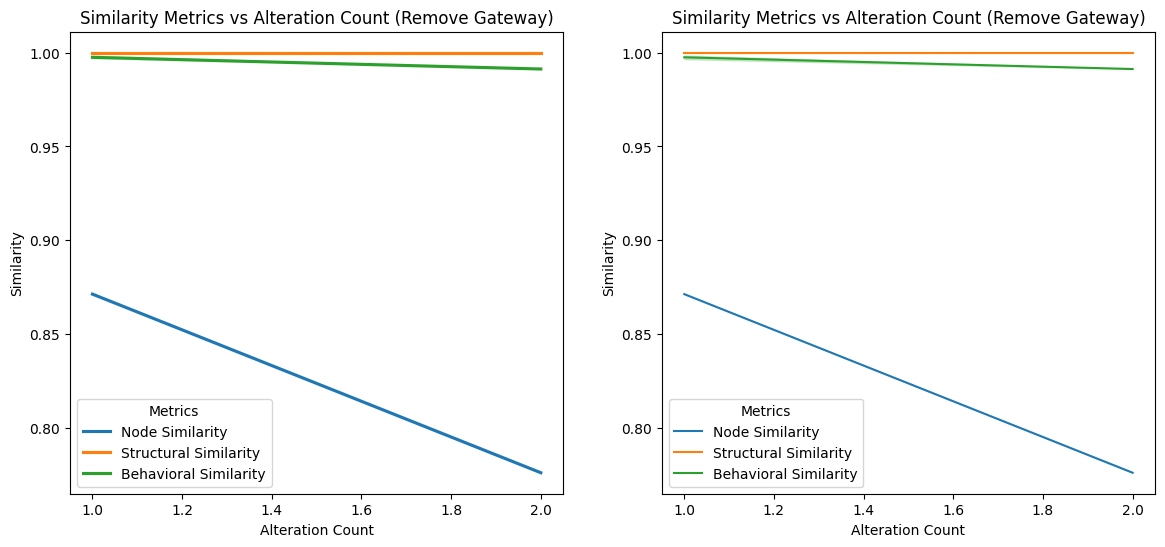

In [18]:
plt.figure(figsize=(10,6))


columns_to_plot = ["Node Similarity", "Structural Similarity", "Behavioral Similarity"]

fig, axes = plt.subplots(1,2, figsize=(14,6))

for col in columns_to_plot:
    sns.regplot(data=df_remove_gateway, x= "Alteration Count", y= col, label=col, scatter=False, order=1, ax=axes[0])
axes[0].legend(title="Metrics")
axes[0].set_xlabel("Alteration Count")
axes[0].set_ylabel("Similarity")
axes[0].set_title("Similarity Metrics vs Alteration Count (Remove Gateway)")


for col in columns_to_plot:
    sns.lineplot(data=df_remove_gateway, x= "Alteration Count", y= col, label=col, ax=axes[1])
axes[1].legend(title="Metrics")
axes[1].set_xlabel("Alteration Count")
axes[1].set_ylabel("Similarity")
axes[1].set_title("Similarity Metrics vs Alteration Count (Remove Gateway)")


1. Overall Trend

    - Monotonicity: Do all metrics decrease as alteration count increases? 
        
        - No (expected)

        - Structural similarity does not change, since it initally does not consider gateways

        - Node similarty decreases as expected, as the gateways in the reference model will not be matched.

        - Behavioral similarity decreases slightly, as the look-back / look-ahead links stay more or less the same.

            - Example after removing "meal-gateway":
            
            Reference model:
            
            **prepare-salad:**
                look_back: {'StartEvent_1', 'meal-gateway', 'decide-dinner'}
                look_ahead: {'Gateway_0ve5rnc', 'happy-end', 'send_text_event'}

            --

            Altered model:

            **prepare-salad:**
                look_back: {'StartEvent_1', 'decide-dinner'}
                look_ahead: {'Gateway_0ve5rnc', 'happy-end', 'send_text_event'}
    
    - Convergence: Do all metrics eventually approach zero (or near zero)? 
        
        - No, since the model only has 2 gateways

2. Relative Slopes & Ordering

    - Which metric is steepest? 
        
        - Node similarity is the most sensitive to changes, as contextual similarity is directly affected.
        
        - Structural similarity: no change
        
        - Behavioral similarity: slight change.

3. Key Crossovers or “Elbows”

    - N/A

4. Spread / Variance

    - Confidence Intervals (Shaded Regions): Low variance for all three lines


----

### 3.1.4 Add Activity

Text(0.5, 1.0, 'Similarity Metrics vs Alteration Count (Add Activity)')

<Figure size 1000x600 with 0 Axes>

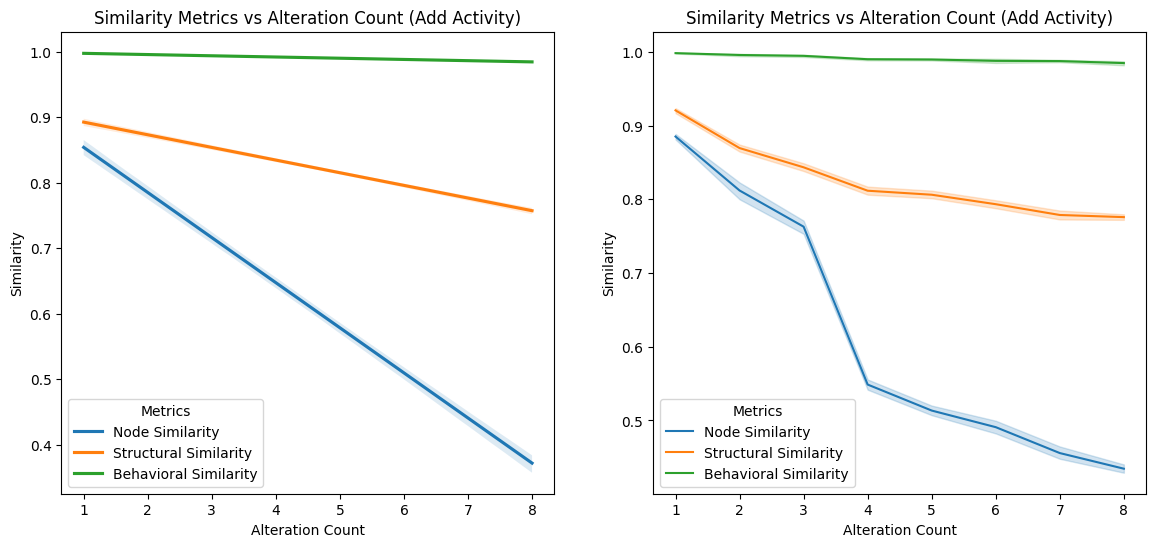

In [19]:
plt.figure(figsize=(10,6))


columns_to_plot = ["Node Similarity", "Structural Similarity", "Behavioral Similarity"]

fig, axes = plt.subplots(1,2, figsize=(14,6))

for col in columns_to_plot:
    sns.regplot(data=df_add_activity, x= "Alteration Count", y= col, label=col, scatter=False, order=1, ax=axes[0])
axes[0].legend(title="Metrics")
axes[0].set_xlabel("Alteration Count")
axes[0].set_ylabel("Similarity")
axes[0].set_title("Similarity Metrics vs Alteration Count (Add Activity)")


for col in columns_to_plot:
    sns.lineplot(data=df_add_activity, x= "Alteration Count", y= col, label=col, ax=axes[1])
axes[1].legend(title="Metrics")
axes[1].set_xlabel("Alteration Count")
axes[1].set_ylabel("Similarity")
axes[1].set_title("Similarity Metrics vs Alteration Count (Add Activity)")


1. Overall Trend

    - Monotonicity: Do all metrics decrease as alteration count increases? 
        
        - Node similarity: yes, since more nodes will NOT have a match

        - Structural similarity: 
            - yes, since the graph-edit-distance will be higher between the two models.
            - not as steep as node similarity, as the original structures remains more or less intact.

        - Behavioral similarity: almost no change, since the behavior (look back and ahead links) of the reference model is mostly captured in the altered model.  

        Example:

         - Reference Model:
            prepare-salad:
                look_back: {'meal-gateway', 'decide-dinner', 'StartEvent_1'}
                look_ahead: {'happy-end', 'send_text_event', 'Gateway_0ve5rnc'}

        - Altered Model:
            prepare-salad:
                look_back: {'userTask_2', 'meal-gateway', 'decide-dinner', 'StartEvent_1'}
                look_ahead: {'happy-end', 'userTask_6', 'userTask_1', 'Gateway_0ve5rnc', 'userTask_4', 'userTask_5', 'send_text_event', 'userTask_7'}

    - Convergence: Do all metrics eventually approach zero (or near zero)? 
        
        - No
            - Node sim: most nodes from reference model will still have matched in altered model
            
            - Structural sim: declines, but does not reach zero since the cost of graph-edit operations for substituted nodes is less than inserted/ deleted nodes.

            - Behavioral sim: same reasoning above

2. Relative Slopes & Ordering

    - Which metric is steepest? 
        
        - Node similarity is the most sensitive to changes, as contextual similarity is directly affected, and some nodes will end up with no match.
        
        - Structural similarity: Less sensitive to adding new flow nodes
        
        - Behavioral similarity: almost no change.

3. Key Crossovers or “Elbows”

    - N/A

4. Spread / Variance

    - Confidence Intervals (Shaded Regions): Low variance


-----

### 3.1.5 Add Flow

Text(0.5, 1.0, 'Similarity Metrics vs Alteration Count (Add Flow)')

<Figure size 1000x600 with 0 Axes>

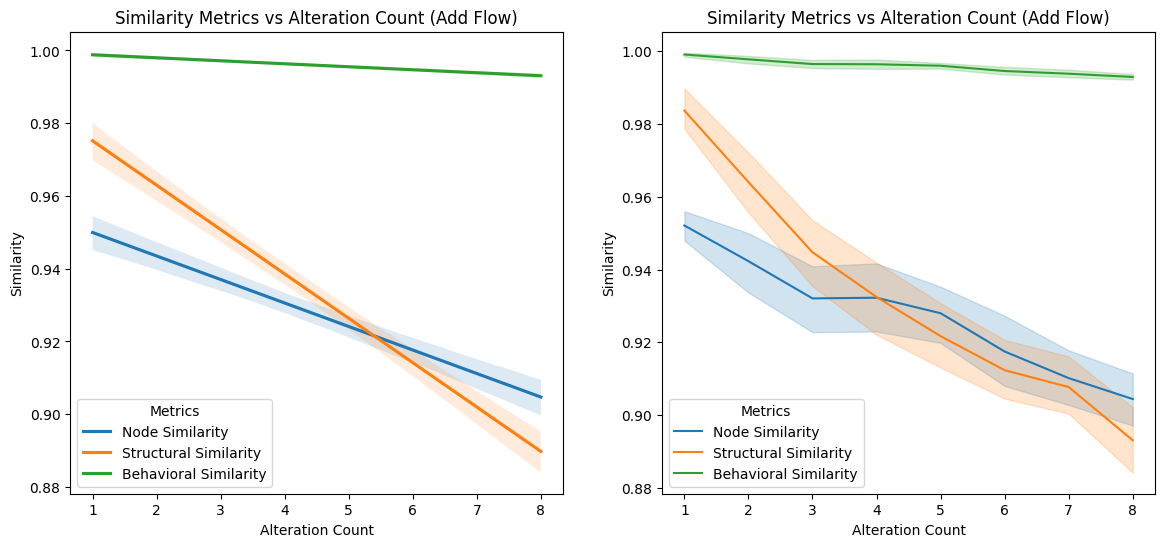

In [20]:
plt.figure(figsize=(10,6))


columns_to_plot = ["Node Similarity", "Structural Similarity", "Behavioral Similarity"]

fig, axes = plt.subplots(1,2, figsize=(14,6))

for col in columns_to_plot:
    sns.regplot(data=df_add_flow, x= "Alteration Count", y= col, label=col, scatter=False, order=1, ax=axes[0])
axes[0].legend(title="Metrics")
axes[0].set_xlabel("Alteration Count")
axes[0].set_ylabel("Similarity")
axes[0].set_title("Similarity Metrics vs Alteration Count (Add Flow)")


for col in columns_to_plot:
    sns.lineplot(data=df_add_flow, x= "Alteration Count", y= col, label=col, ax=axes[1])
axes[1].legend(title="Metrics")
axes[1].set_xlabel("Alteration Count")
axes[1].set_ylabel("Similarity")
axes[1].set_title("Similarity Metrics vs Alteration Count (Add Flow)")


Adding new flows shows little change in the three similarity metrics, as their values stay >= 0.88.

The plot shows high variance however, which indicates that the effect of adding new flows might affect slightly or heavily, depending on where the flow was added.

-----

### 3.1.6 Change Label

Text(0.5, 1.0, 'Similarity Metrics vs Alteration Count (Change Label)')

<Figure size 1000x600 with 0 Axes>

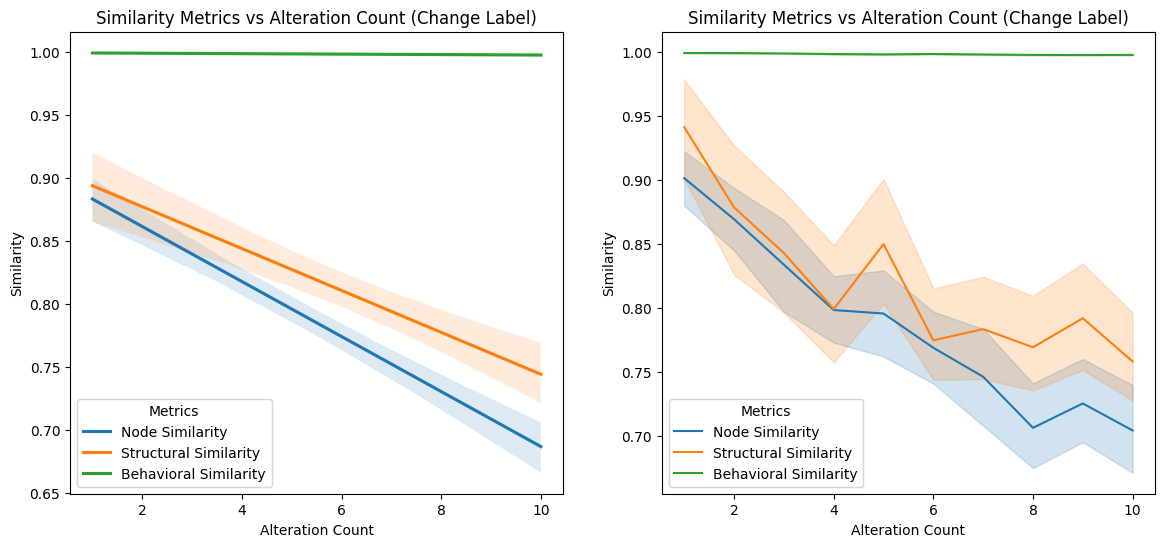

In [4]:
plt.figure(figsize=(10,6))


columns_to_plot = ["Node Similarity", "Structural Similarity", "Behavioral Similarity"]

fig, axes = plt.subplots(1,2, figsize=(14,6))

for col in columns_to_plot:
    sns.regplot(data=df_change_label, x= "Alteration Count", y= col, label=col, scatter=False, order=1, ax=axes[0])
axes[0].legend(title="Metrics")
axes[0].set_xlabel("Alteration Count")
axes[0].set_ylabel("Similarity")
axes[0].set_title("Similarity Metrics vs Alteration Count (Change Label)")


for col in columns_to_plot:
    sns.lineplot(data=df_change_label, x= "Alteration Count", y= col, label=col, ax=axes[1])
axes[1].legend(title="Metrics")
axes[1].set_xlabel("Alteration Count")
axes[1].set_ylabel("Similarity")
axes[1].set_title("Similarity Metrics vs Alteration Count (Change Label)")


1. Overall Trend

    - Monotonicity: Do all metrics decrease as alteration count increases? 
        
        - Node similarity: yes, since more nodes will NOT have a match (result of changing labels)

        - Structural similarity: 
            - yes, since the graph-edit-distance will be increase between the two models (some nodes will have no match and will be considered as inserted/deleted -> increased graph-edit-distance).
            - not as steep as node similarity, as the original structures remains more or less intact.

        - Behavioral similarity: almost no change, since the behavior (look back and ahead links) of the reference and altered models is identical. 

    - Convergence: Do all metrics eventually approach zero (or near zero)? 
     
        - Node sim: if ALL the labels in the altered model are completely different (does not pass threshold), then it would reach zero. Otherwise, since choosing the node for which the label should be changed is random, some labels could be changed twice, which leaves the unchanged labels with matches in the altered model.
        
        - Structural sim: declines, but does not reach zero since the original structures remains the same.

        - Behavioral sim: same reasoning above

2. Relative Slopes & Ordering

    - Which metric is steepest? 
        
        - Node similarity is the most sensitive to changes, as contextual similarity is directly affected, and some nodes will end up with no match.
        
        - Structural similarity: Less sensitive to changing labels
        
        - Behavioral similarity: almost no change.

3. Key Crossovers or “Elbows”

    - N/A

4. Spread / Variance

    - Confidence Intervals (Shaded Regions): high variance, depending on whether the same label was changed more than once, leaving others unchanged.


-----

### 3.2 F1-Score 


F1-Score is calculated in my implementation as follows:

- Nodes are matched via **label similarity** (max(syntactic_simlarity, semantic_similarity)), threshold = 0.8. (if flow nodes are of same type)

- Flows are matched, if their corresponding **source** and **target nodes** are matched as described above.

- True positive nodes **(tp_nodes)**: len(matched_nodes)
    - Nodes that **exist in both** the reference model and the discovered model.

- False positive nodes **(fp_nodes)**: len(altered_model_nodes) - tp_nodes
    - Nodes that appear in the discovered model but are not present in the reference model.

- False negative nodes **(fn_nodes)**: len(reference_model_nodes) - tp_nodes
    - Nodes that were in the reference model but are missing in the discovered model.

- **tp_flows**, **fp_flows** and **fn_flows**: same approach as above  
<br>

- **TP**: tp_nodes + tp_flows, **FP**: fp_nodes + fp_flows, **FN**: fn_nodes + fn_flows

- **Precision** = tp / (tp + fp)

- **Recall** = tp / (tp + fn)

- **F1-Score** = (2 * precision * recall) / (precision + recall)

----

### 3.2.1 Remove Activity

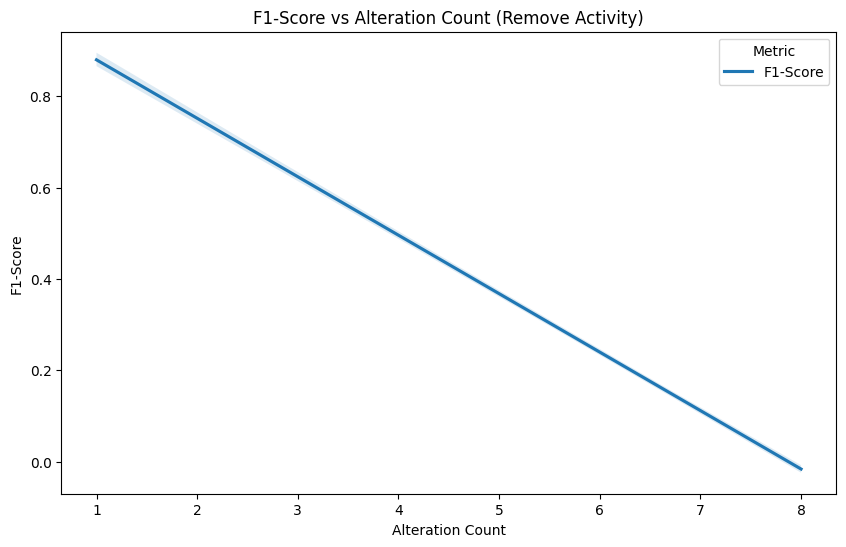

In [22]:
plt.figure(figsize=(10,6))
plt.title("F1-Score vs Alteration Count (Remove Activity)")

columns_to_plot = ["F1-Score"]

for col in columns_to_plot:
    sns.regplot(data=df_remove_activity, x= "Alteration Count", y= col, label=col, scatter=False)

plt.legend(title="Metric")
plt.xlabel("Alteration Count")
plt.ylabel("F1-Score");

F1 Score experiences a linear decrease as number alterations increase (expected). 


-----

### 3.2.2 Remove Flow

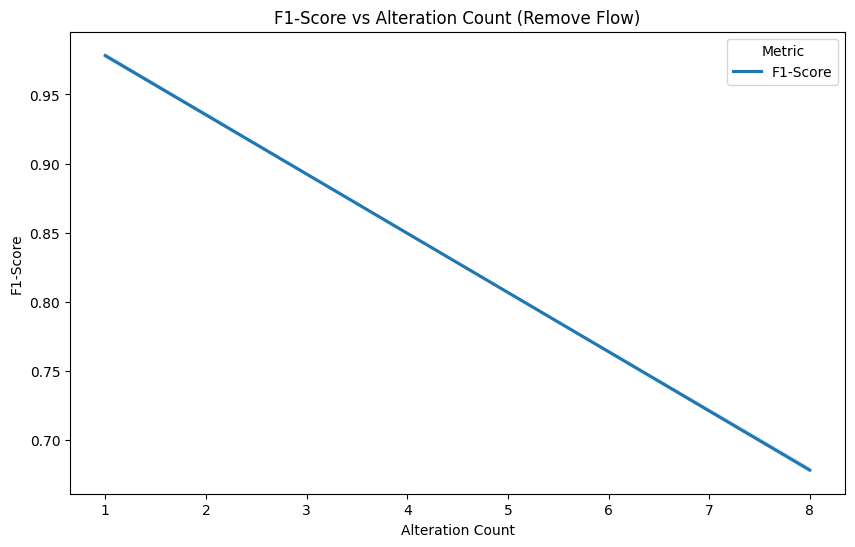

In [23]:
plt.figure(figsize=(10,6))
plt.title("F1-Score vs Alteration Count (Remove Flow)")

columns_to_plot = ["F1-Score"]

for col in columns_to_plot:
    sns.regplot(data=df_remove_flow, x= "Alteration Count", y= col, label=col, scatter=False)

plt.legend(title="Metric")
plt.xlabel("Alteration Count")
plt.ylabel("F1-Score");

F1 Score experiences a linear decrease as number alterations increase (expected). 

Does not reach zero, since flow nodes remain (without any edges/flows)

-----

### 3.2.3 Remove Gateway

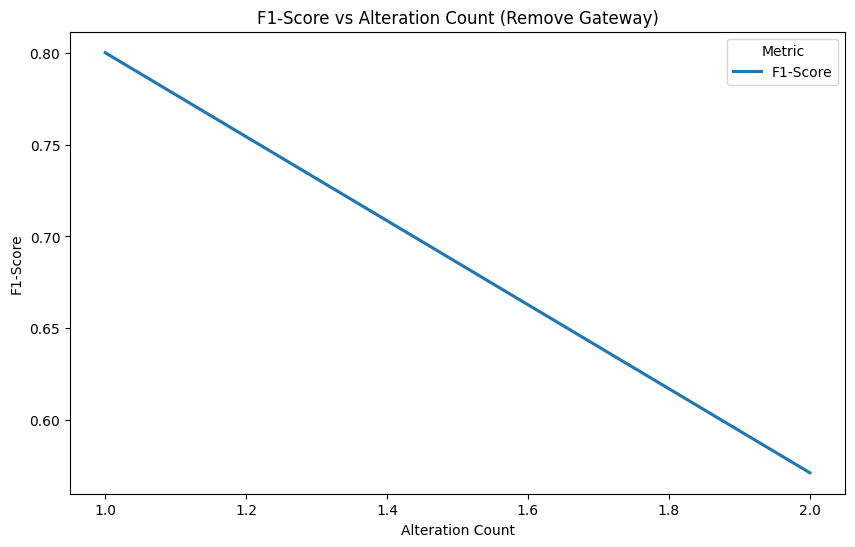

In [24]:
plt.figure(figsize=(10,6))
plt.title("F1-Score vs Alteration Count (Remove Gateway)")

columns_to_plot = ["F1-Score"]

for col in columns_to_plot:
    sns.regplot(data=df_remove_gateway, x= "Alteration Count", y= col, label=col, scatter=False)

plt.legend(title="Metric")
plt.xlabel("Alteration Count")
plt.ylabel("F1-Score");

F1 Score experiences a linear decrease as more gateways are removed (expected). 

Does not reach zero because of remaining flow nodes and flows

-----

### 3.2.4 Add Activity

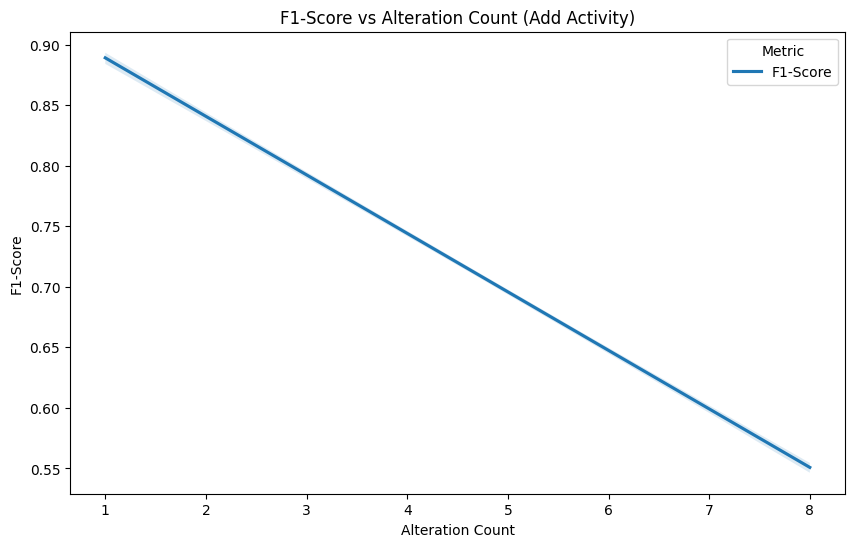

In [25]:
plt.figure(figsize=(10,6))
plt.title("F1-Score vs Alteration Count (Add Activity)")

columns_to_plot = ["F1-Score"]

for col in columns_to_plot:
    sns.regplot(data=df_add_activity, x= "Alteration Count", y= col, label=col, scatter=False)

plt.legend(title="Metric")
plt.xlabel("Alteration Count")
plt.ylabel("F1-Score");

F1 Score experiences a linear decrease as more activites are added (expected). 

Does not reach zero because the remaining flow nodes and flows stay the same in both models


----

### 3.2.5 Add Flow

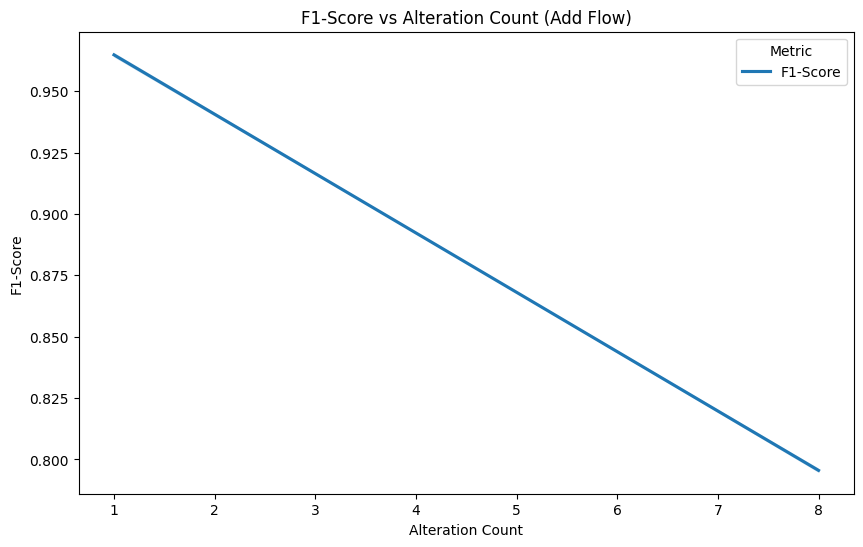

In [26]:
plt.figure(figsize=(10,6))
plt.title("F1-Score vs Alteration Count (Add Flow)")

columns_to_plot = ["F1-Score"]

for col in columns_to_plot:
    sns.regplot(data=df_add_flow, x= "Alteration Count", y= col, label=col, scatter=False)

plt.legend(title="Metric")
plt.xlabel("Alteration Count")
plt.ylabel("F1-Score");

Same reasoning as above

----

### 3.2.6 Change Label

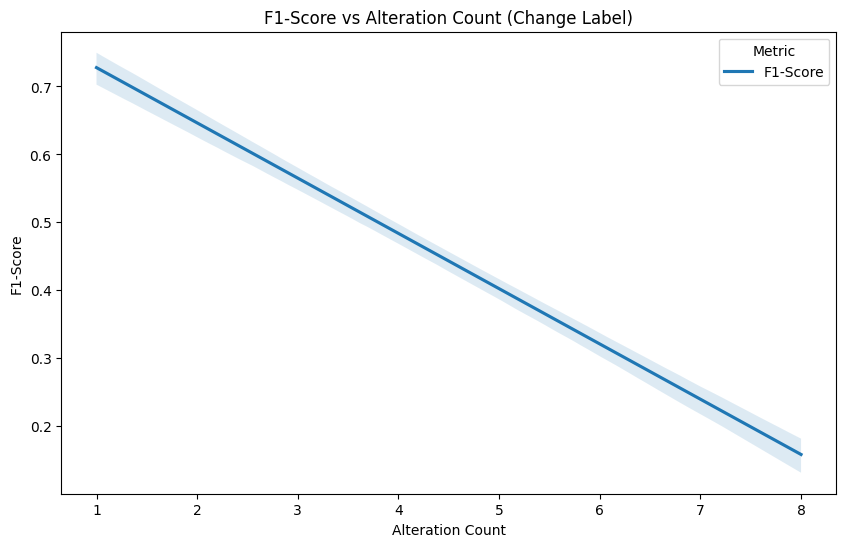

In [27]:
plt.figure(figsize=(10,6))
plt.title("F1-Score vs Alteration Count (Change Label)")

columns_to_plot = ["F1-Score"]

for col in columns_to_plot:
    sns.regplot(data=df_change_label, x= "Alteration Count", y= col, label=col, scatter=False)

plt.legend(title="Metric")
plt.xlabel("Alteration Count")
plt.ylabel("F1-Score");

Linear decrease as more labels are changed. 

F1 Score depends on label similarity for matching, so this result is expected.

----

### 3.3 Compliance Metric [Gerke09] 


Goal is to calculate the compliance of a business process model with a reference process model.

Activites are mapped from the Reference model to the second model via label similarity analogue to the F1 Score.

Function “lcs” calculates the length of the longest common subsequence of two firing sequences (WF-nets), thereby finding the maximum number of identical activities while preserving the activity order. The greater the value returned, the more similar the firing sequences are.

- **Compliance Degree:** Measures the extent to which the firing sequences of a discovered process model conform to the reference model, ensuring that the observed behavior aligns with the expected sequences.

- **Compliance Maturity:** Evaluates how much of the reference model’s firing sequences are present in the discovered model, indicating whether all prescribed process steps are implemented in practice.

----

### 3.3.1 Remove Activity

Text(0.5, 0.98, 'Compliance metrics vs Alteration Count (Remove Activity)')

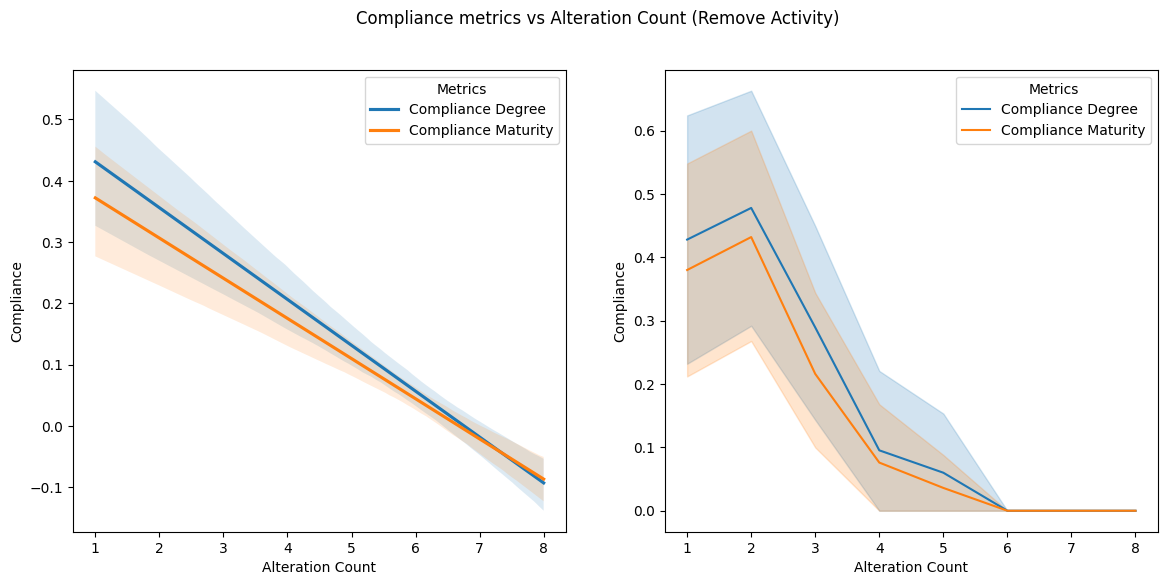

In [28]:
columns_to_plot = ["Compliance Degree", "Compliance Maturity"]

fig, axes = plt.subplots(1,2, figsize=(14, 6))

for col in columns_to_plot:
    sns.regplot(data=df_remove_activity, x= "Alteration Count", y= col, label=col, scatter=False, ax= axes[0])

axes[0].legend(title="Metrics")
axes[0].set_xlabel("Alteration Count")
axes[0].set_ylabel("Compliance")


for col in columns_to_plot:
    sns.lineplot(data=df_remove_activity, x= "Alteration Count", y= col, label=col, ax= axes[1])

axes[1].legend(title="Metrics")
axes[1].set_xlabel("Alteration Count")
axes[1].set_ylabel("Compliance")

fig.suptitle("Compliance metrics vs Alteration Count (Remove Activity)")

1. Overall Trend

    - Monotonicity: Do all metrics decrease as alteration count increases?
        - Yes, very sensitive to changes. (expected)
    - Convergence: Do all metrics eventually approach zero (or near zero)?
        - Yes (expected)

2. Relative Slopes & Ordering

    - Which metric is steepest?
        
        - Both have the almost the same steepness and sensitivity. Since they depend on firing sequences, removing one activity could ruin the whole sequence, which also explains the high variance. 
        
        - For example, if a start or end event was removed, no firing sequences will be generated -> compliance = 0



----

### 3.3.2 Remove Flow

Text(0.5, 0.98, 'Compliance metrics vs Alteration Count (Remove Flow)')

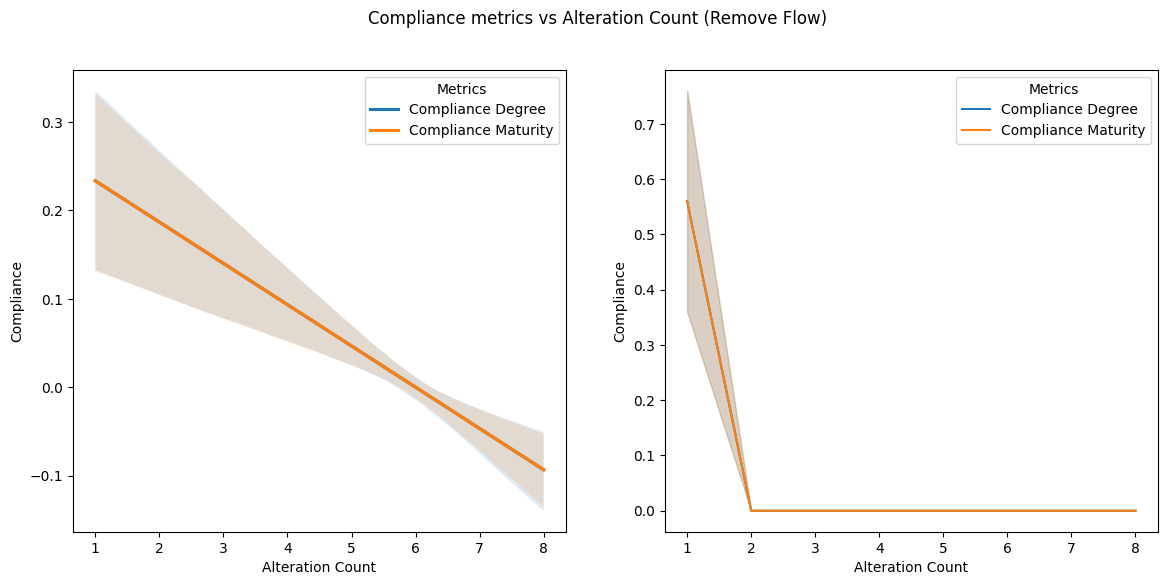

In [29]:
columns_to_plot = ["Compliance Degree", "Compliance Maturity"]

fig, axes = plt.subplots(1,2, figsize=(14, 6))

for col in columns_to_plot:
    sns.regplot(data=df_remove_flow, x= "Alteration Count", y= col, label=col, scatter=False, ax= axes[0])

axes[0].legend(title="Metrics")
axes[0].set_xlabel("Alteration Count")
axes[0].set_ylabel("Compliance")


for col in columns_to_plot:
    sns.lineplot(data=df_remove_flow, x= "Alteration Count", y= col, label=col, ax= axes[1])

axes[1].legend(title="Metrics")
axes[1].set_xlabel("Alteration Count")
axes[1].set_ylabel("Compliance")

fig.suptitle("Compliance metrics vs Alteration Count (Remove Flow)")

Same reasoning as above. Removing one flow could lead to firing no sequences at all!

----

### 3.3.3 Remove Gateway

Text(0.5, 0.98, 'Compliance metrics vs Alteration Count (Remove Gateway)')

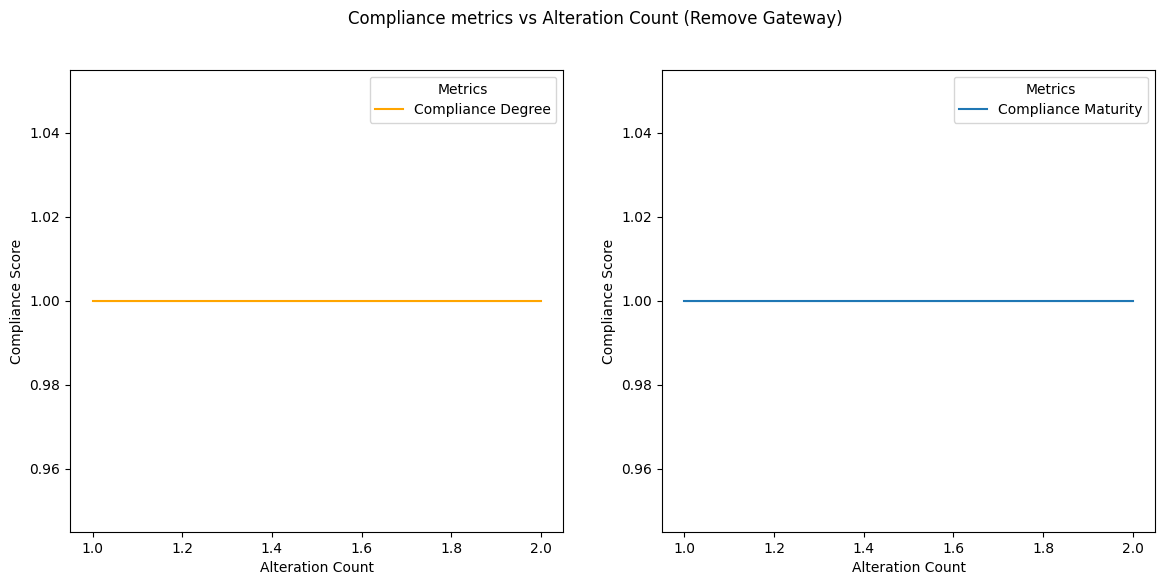

In [30]:
columns_to_plot = ["Compliance Degree", "Compliance Maturity"]

fig, axes = plt.subplots(1,2, figsize=(14, 6))


sns.lineplot(data=df_remove_gateway, x= "Alteration Count", y= "Compliance Degree", label="Compliance Degree",color="orange",  ax= axes[0])

axes[0].legend(title="Metrics")
axes[0].set_xlabel("Alteration Count")
axes[0].set_ylabel("Compliance Score")



sns.lineplot(data=df_remove_gateway, x= "Alteration Count", y= "Compliance Maturity", label=col,  ax= axes[1])

axes[1].legend(title="Metrics")
axes[1].set_xlabel("Alteration Count")
axes[1].set_ylabel("Compliance Score")

fig.suptitle("Compliance metrics vs Alteration Count (Remove Gateway)")

The reason behind this is because of the way BPMN models are converted to Petri nets.

Explanation:

- **Reference Model Firing Sequences:**
    - Hungry, Decide what's for dinner, Prepare salad, Send a text, Happy
    - Hungry, Decide what's for dinner, Prepare chicken, Send a text, Happy

After removing both gateways, the source and activity target of each gateway will be connected. So the altered model will look like this:


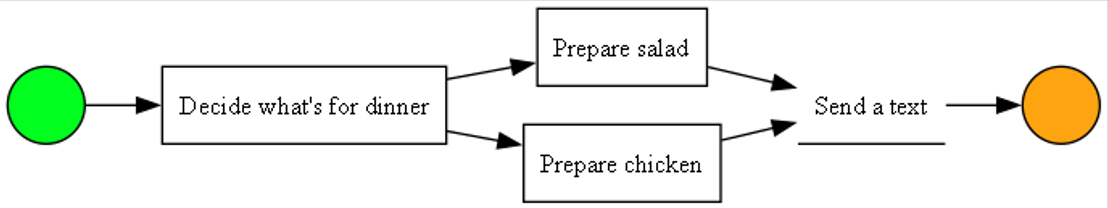


Converting the altered model to a petri net, the tasks will turn to transitions with entering and exiting places. Each exiting place will then connect to the target transition via an arc:

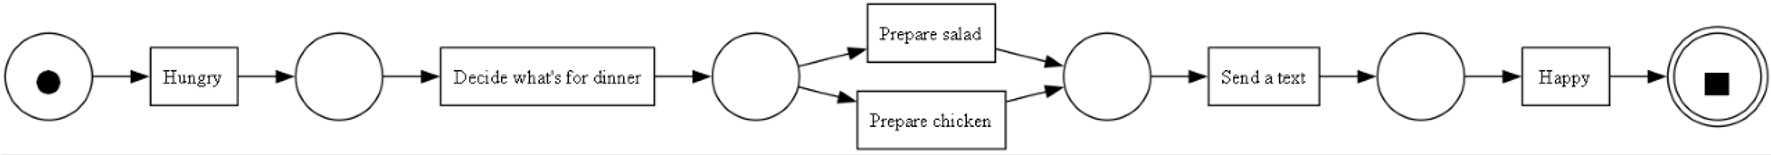


- **Altered Firing Sequences:**
    - Hungry, Decide what's for dinner, Prepare chicken, Send a text, Happy
    - Hungry, Decide what's for dinner, Prepare salad, Send a text, Happy

Thus the firing sequences of the altered model will be identical and result in 1.0 similarity.

----

### 3.3.4 Add Activity

Text(0.5, 0.98, 'Compliance metrics vs Alteration Count (Add Activity)')

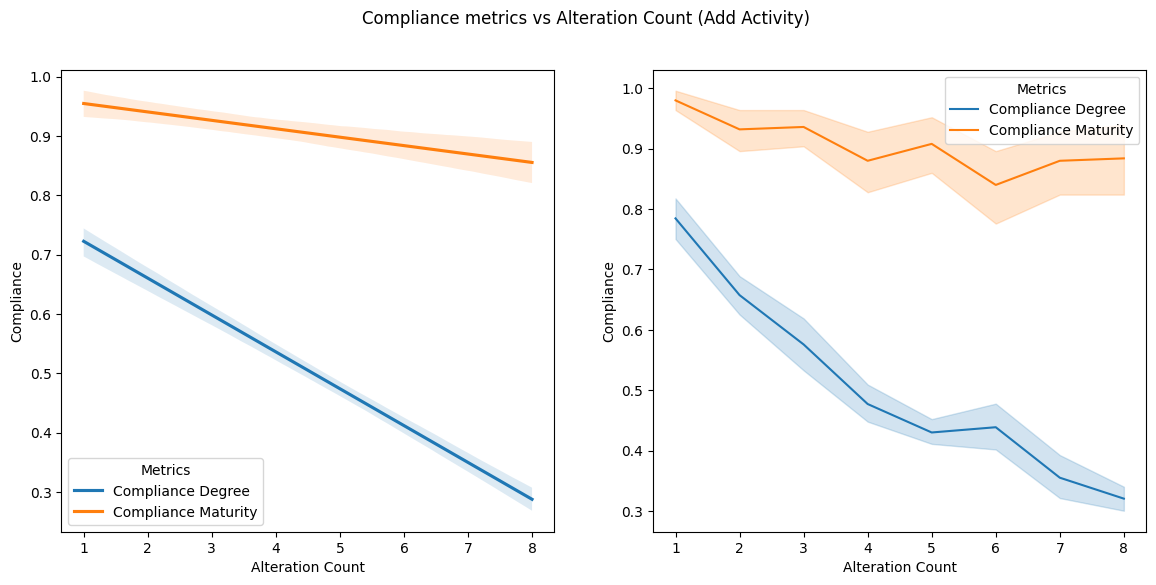

In [31]:
columns_to_plot = ["Compliance Degree", "Compliance Maturity"]

fig, axes = plt.subplots(1,2, figsize=(14, 6))

for col in columns_to_plot:
    sns.regplot(data=df_add_activity, x= "Alteration Count", y= col, label=col, scatter=False, ax= axes[0])

axes[0].legend(title="Metrics")
axes[0].set_xlabel("Alteration Count")
axes[0].set_ylabel("Compliance")


for col in columns_to_plot:
    sns.lineplot(data=df_add_activity, x= "Alteration Count", y= col, label=col, ax= axes[1])

axes[1].legend(title="Metrics")
axes[1].set_xlabel("Alteration Count")
axes[1].set_ylabel("Compliance")

fig.suptitle("Compliance metrics vs Alteration Count (Add Activity)")

1. Overall Trend

    - Monotonicity: Do all metrics decrease as alteration count increases? 
        
        - Yes (expected)
    
    - Convergence: Do all metrics eventually approach zero (or near zero)? 
        
        - Compliance Degree: yes, since the more firing sequences in the altered model will not be mapped (sequence found in altered model but not in reference model).
        - Compliance Maturity: Has a downward trend, by adding more and more activities, sequences in reference model will still be mapped, but LCS will be lower. I tried adding 25 more activites, compliance maturity was still positive, which means it will not reach zero.

2. Relative Slopes & Ordering

    - Which metric is steepest? 
        
        - *Compliance Degree is more sensitive:* since the more firing sequences in the altered model will not be mapped (sequence found in altered model but not in reference model). 

        - Compliance maturity is less sensitive, since sequences in reference model will always be part of sequences in altered model when adding more activities.
        

3. Spread / Variance

    - Confidence Intervals (Shaded Regions): High variance, since it depends on where the activities where added and how much the firing sequences change over the alterations.


----

### 3.3.5 Add Flow

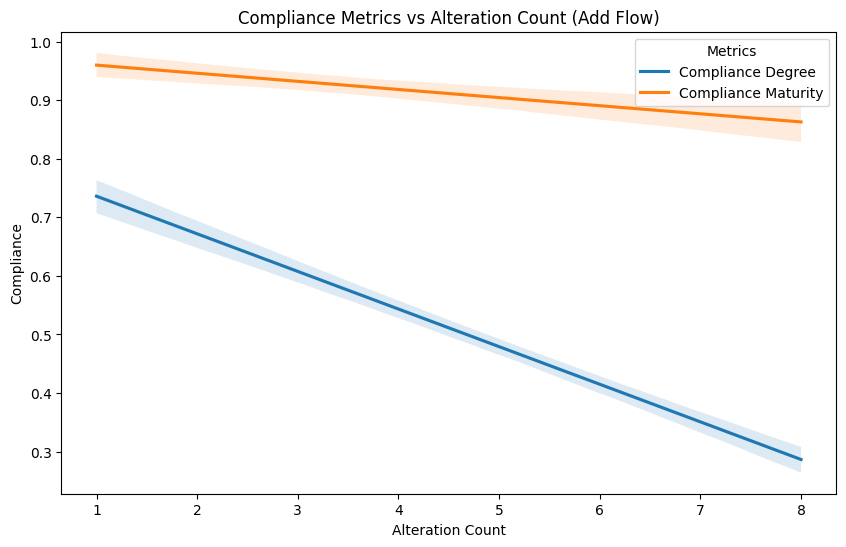

In [32]:
plt.figure(figsize=(10,6))
plt.title("Compliance Metrics vs Alteration Count (Add Flow)")

columns_to_plot = ["Compliance Degree", "Compliance Maturity"]

for col in columns_to_plot:
    sns.regplot(data=df_add_flow, x= "Alteration Count", y= col, label=col, scatter=False)

plt.legend(title="Metrics")
plt.xlabel("Alteration Count")
plt.ylabel("Compliance");

Same reasoning as adding more activites.

----

### 3.3.6 Change Label

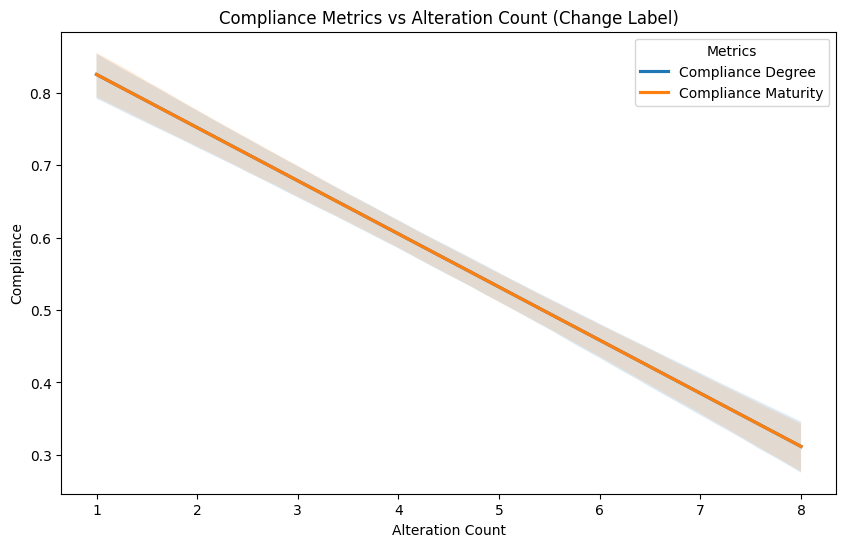

In [33]:
plt.figure(figsize=(10,6))
plt.title("Compliance Metrics vs Alteration Count (Change Label)")

columns_to_plot = ["Compliance Degree", "Compliance Maturity"]

for col in columns_to_plot:
    sns.regplot(data=df_change_label, x= "Alteration Count", y= col, label=col, scatter=False)

plt.legend(title="Metrics")
plt.xlabel("Alteration Count")
plt.ylabel("Compliance");

Linear decrease in both compliance metrics as the LCS of the sequences in both models will decrease.

Below is an example showing what happens when we change all labels:

- Extended Firing Sequences:
    - Hungry, Decide what's for dinner, Prepare chicken, Send a text, Happy
    - Hungry, Decide what's for dinner, Prepare salad, Send a text, Happy

- Altered Firing Sequences:
    - cMk4eThewn_5, C84cNGvFli_2, 9W3Y54VFt1_8, 8ErlCp9Rso_1, oyGOKsBu9N_7
    - cMk4eThewn_5, C84cNGvFli_2, C84cNfvFli_2, 8ErlCp9Rso_1, oyGOKsBu9N_7

ComplianceMetric Results:

    compliance_degree        : 0.0000
    compliance_maturity      : 0.0000

Thus , both compliance metrics will reach zero.

----

### 4.0 Combined Results / Comparison:

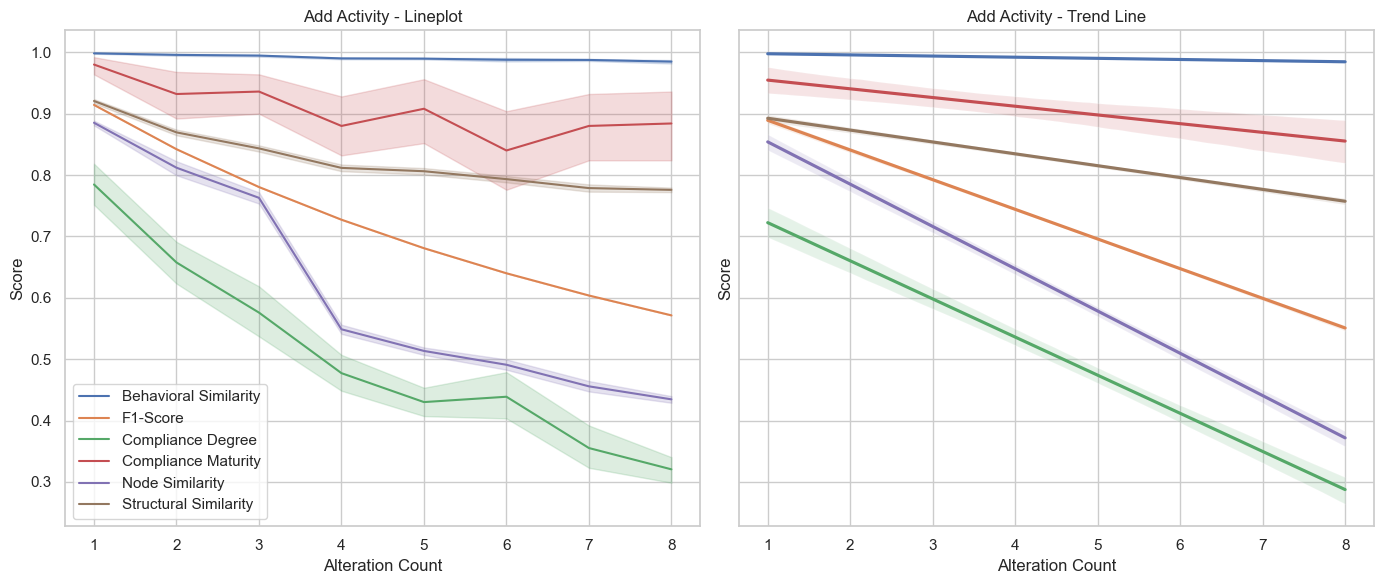

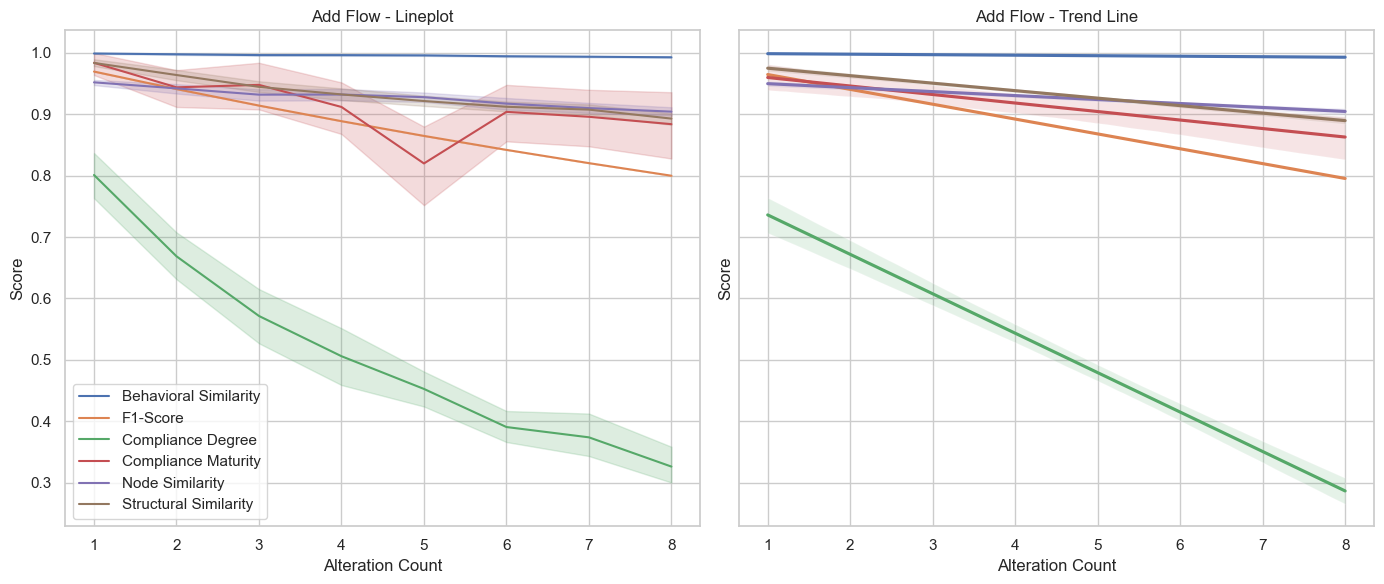

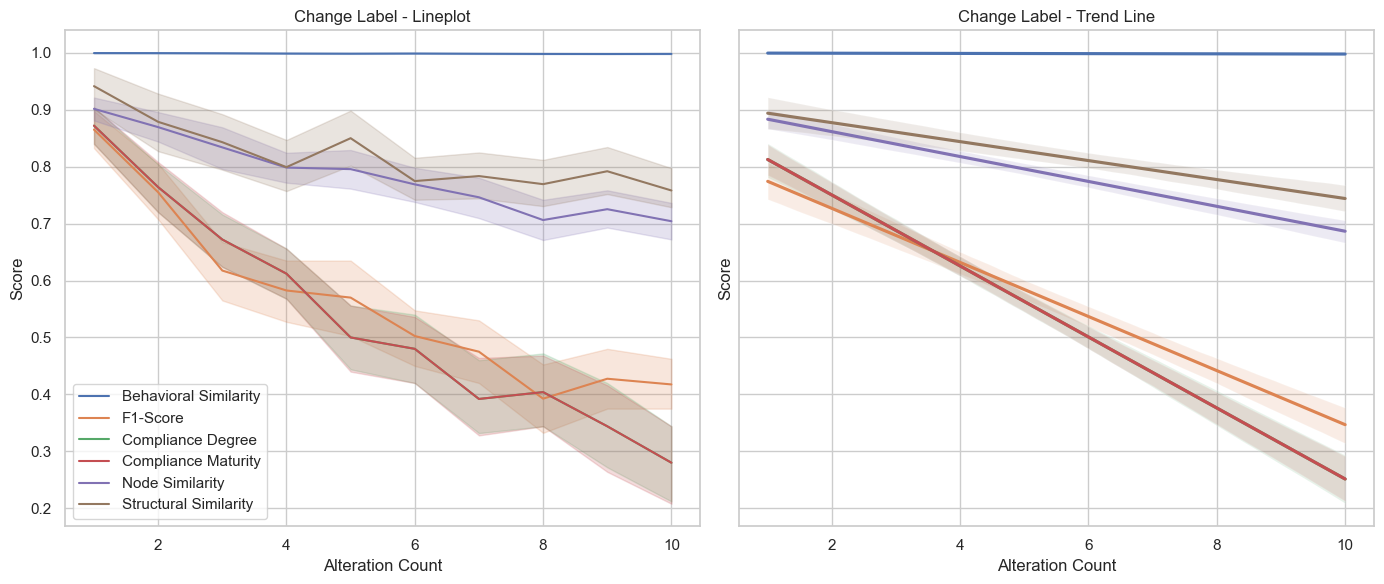

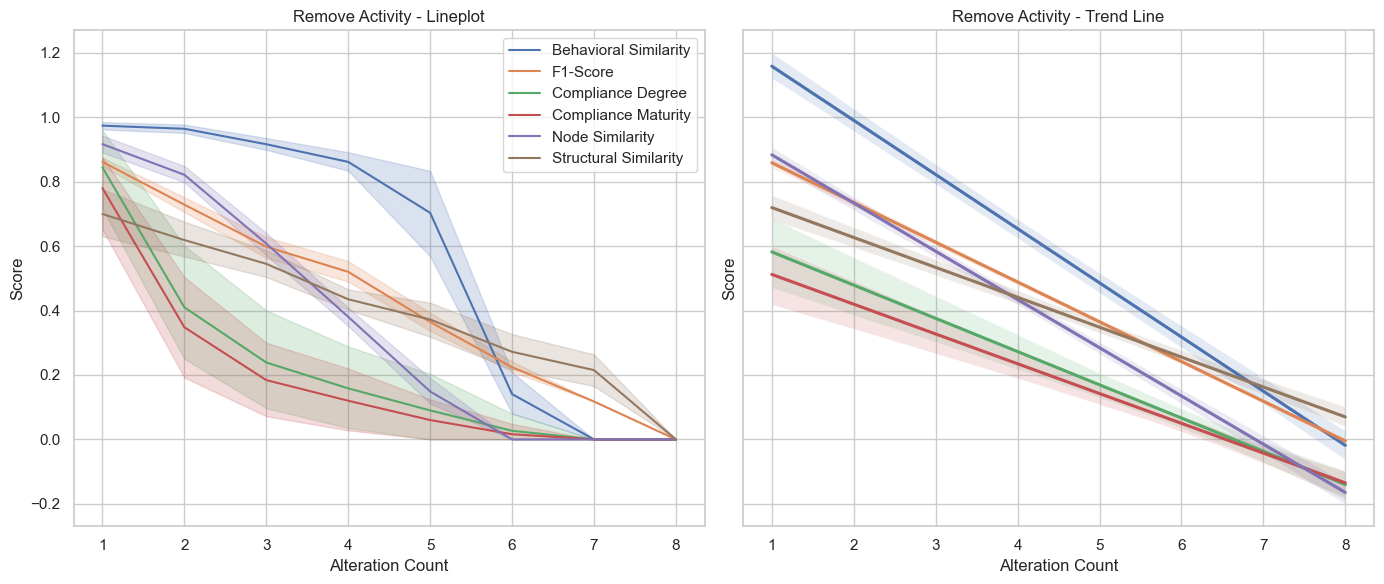

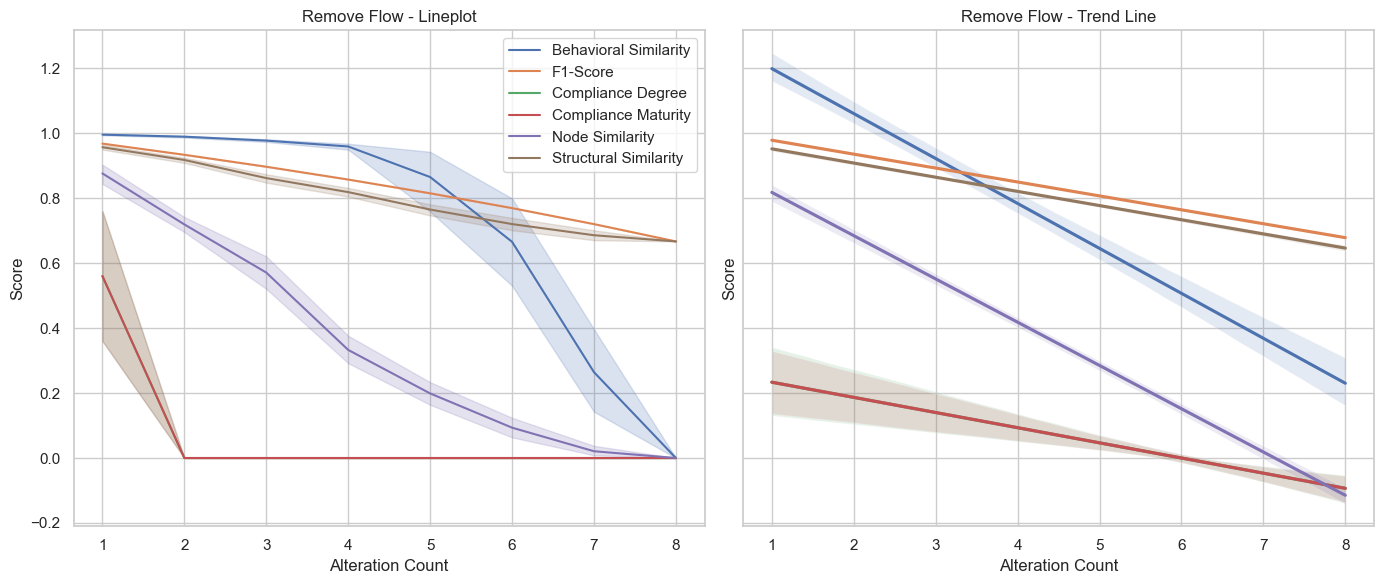

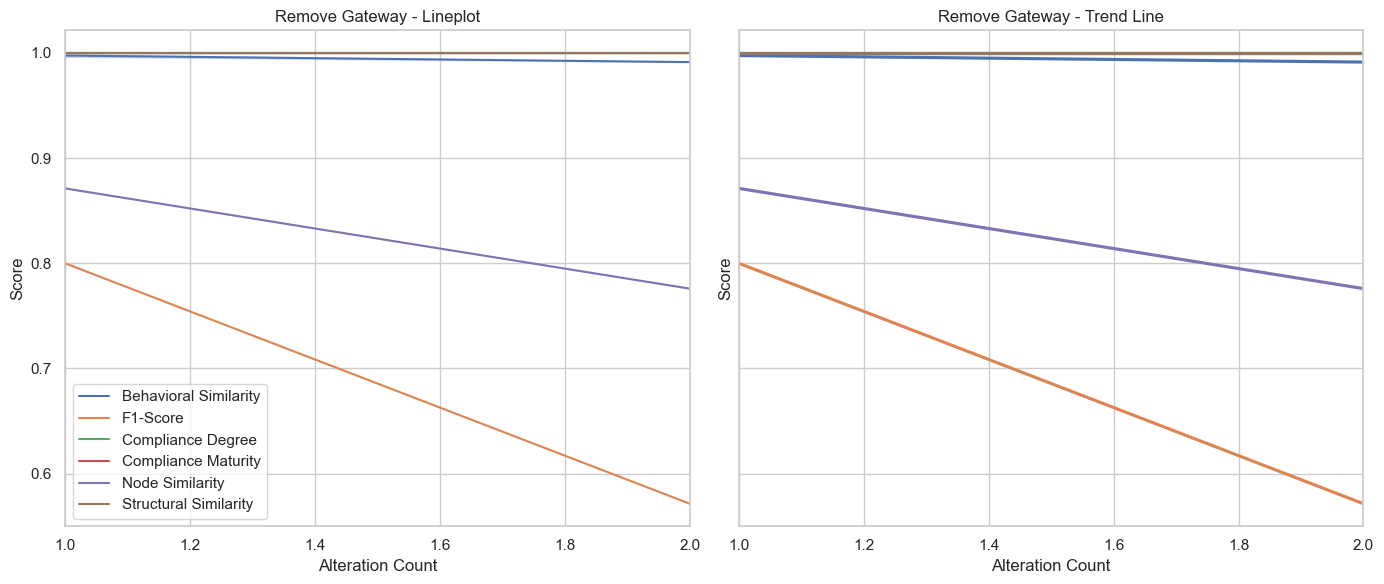

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")  # This gives you the clean look with grid and no black border


file_paths = {
    "Add Activity": "C:/Users/HP/OneDrive/Documents/Projects/metrics_implementation/tool/csv/test_add_activity_new.csv",
    "Add Flow": "C:/Users/HP/OneDrive/Documents/Projects/metrics_implementation/tool/csv/test_add_flow_new.csv",
    "Change Label": "C:/Users/HP/OneDrive/Documents/Projects/metrics_implementation/tool/csv/test_change_label_new_lg.csv",
    "Remove Activity": "C:/Users/HP/OneDrive/Documents/Projects/metrics_implementation/tool/csv/test_remove_flowNode_new.csv",
    "Remove Flow": "C:/Users/HP/OneDrive/Documents/Projects/metrics_implementation/tool/csv/test_remove_flow_new.csv",
    "Remove Gateway": "C:/Users/HP/OneDrive/Documents/Projects/metrics_implementation/tool/csv/test_remove_gateway_new.csv"
}

columns_to_plot = [
    "Behavioral Similarity",  
    "F1-Score", 
    "Compliance Degree", 
    "Compliance Maturity", 
    "Node Similarity", 
    "Structural Similarity"
]

# Load datasets
datasets = {key: pd.read_csv(path) for key, path in file_paths.items()}

# Create plots
for title, df in datasets.items():
    fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)
    
    # Lineplot with confidence intervals
    for col in columns_to_plot:
        sns.lineplot(data=df, x="Alteration Count", y=col, ax=axes[0], label=col)
    axes[0].set_title(f"{title} - Lineplot")
    axes[0].set_xlabel("Alteration Count")
    axes[0].set_ylabel("Score")
    axes[0].legend(loc="best")

    # Regplot (trend line without scatter)
    for col in columns_to_plot:
        sns.regplot(data=df, x="Alteration Count", y=col, ax=axes[1], scatter=False, label=col)
    axes[1].set_title(f"{title} - Trend Line")
    axes[1].set_xlabel("Alteration Count")
    axes[1].set_ylabel("Score")
    # Remove legend from second plot
    if axes[1].get_legend():
        axes[1].get_legend().remove()
    
    # Special x-axis limit for Remove Gateway
    if title == "Remove Gateway":
        axes[0].set_xlim(1, 2)
        axes[1].set_xlim(1, 2)
    
    plt.tight_layout()
    plt.show()


### is it worth it using the metric?


- Sensitivity:
    - Compliance Metric is the most sensitive to alterations, since firing sequences are very strict and one small change could lead to firing no sequences at all.
    - F1 Score seems to be the most predictable and consistent, but it does not always capture meaningful information. If it is only about 1 to 1 matching based on labels, then F1 Scores are great. But when it comes to relationships between flownodes and the behavioral similarities, it does not really help.
    - Behavioral similarity is the most robust. It literally shows the how much of the relationships from the first model are carried on to the second.

- Consistency:
    - F1 Score is the most consistent, since it only depends on 1 to 1 label similarity matching.
    
    - Compliance degree is the least consistent showing very high variance, because the score always depends on the alteration performed. If the alteration greatly impacts firing sequences -> big drop in similarity score.
    
    - Behavioral similarity is consistent, but shows high variance when the alteration number reaches its limit (8 in our case). 
        - for example, we can observe the big drops when we start removing the 5th or 6th flow node, since this is the point where the look back and ahead links are most affected.
        - gateway removal needs to be checked in more detail and different models. (model is ambiguous after replacing gateway with flows)

- All four metrics do penalize processes with increasing numbers of alterations, which is what we would expect.



It really depends on the use case and metric definition.

- If we are checking that the altered model contains the behavior of the reference model -> Behavioral Similarity is best, since it considers look-back/ lock ahead relations between flow nodes more than matching them individually.

- If we are checking to see if the altered model replays the seq


-----

### Testing different thresholds, how do the behave in different situations?

### 4.1 Add Activity

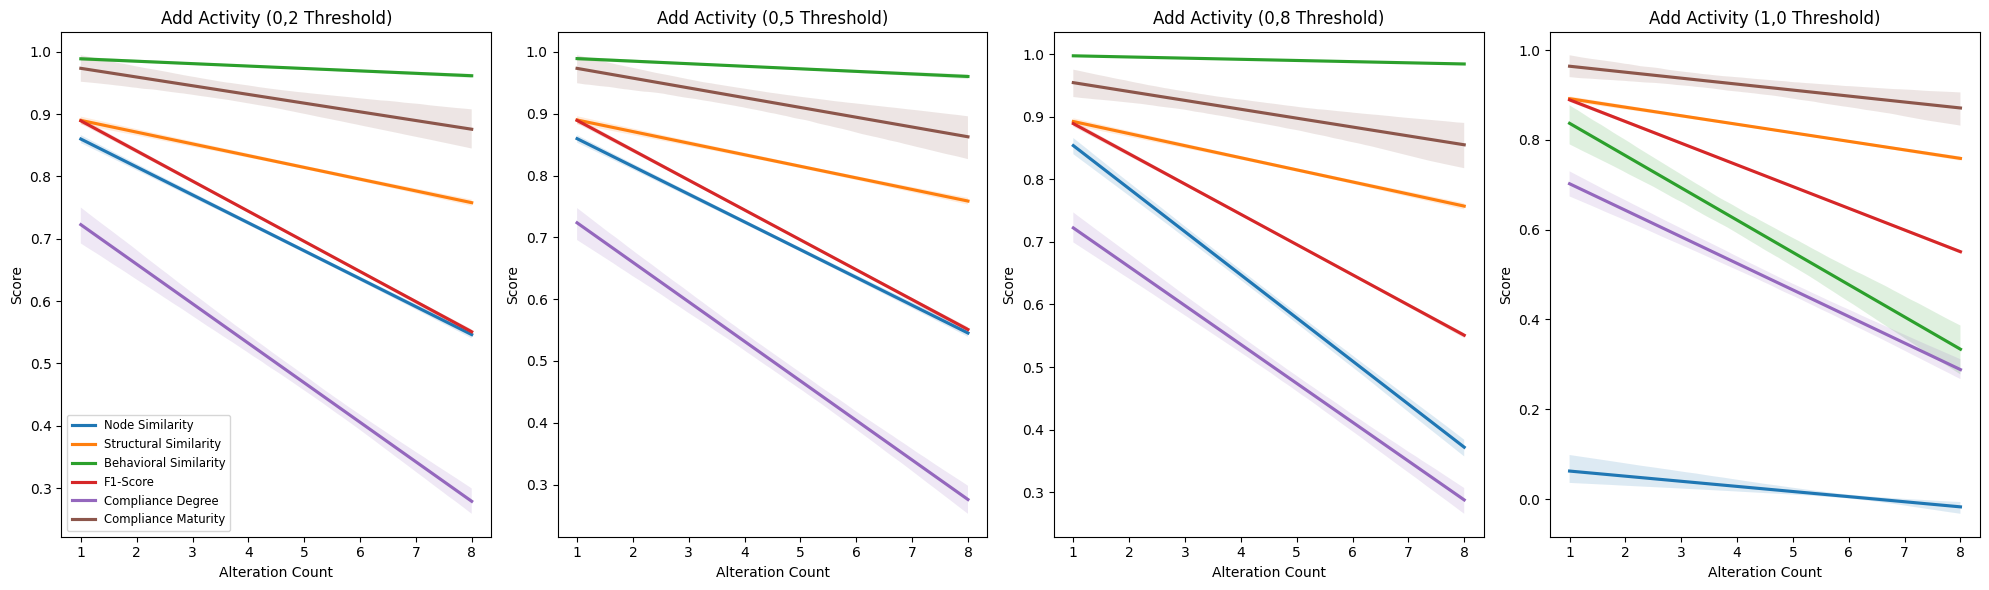

In [35]:
file_paths_add_activity_thresholds = {
    "Add Activity (0,2 Threshold)": "C:/Users/HP/OneDrive/Documents/Projects/metrics_implementation/tool/csv/test_add_activity_02_thres.csv",
    "Add Activity (0,5 Threshold)": "C:/Users/HP/OneDrive/Documents/Projects/metrics_implementation/tool/csv/test_add_activity_new_0_5_threshold.csv",
    "Add Activity (0,8 Threshold)": "C:/Users/HP/OneDrive/Documents/Projects/metrics_implementation/tool/csv/test_add_activity_new.csv",
    "Add Activity (1,0 Threshold)": "C:/Users/HP/OneDrive/Documents/Projects/metrics_implementation/tool/csv/test_add_activity_1_thres.csv"
}


columns_to_plot = ["Node Similarity","Structural Similarity", "Behavioral Similarity", "F1-Score", "Compliance Degree", "Compliance Maturity"]


datasets_add_activity = {key: pd.read_csv(path) for key, path in file_paths_add_activity_thresholds.items()}


fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 6), sharex=True) 
axes = axes.flatten()

for plot_index, (ax, (title, df)) in enumerate(zip(axes, datasets_add_activity.items())):
    for col in columns_to_plot:
        sns.regplot(x=df["Alteration Count"], y=df[col], ax=ax, label=col, scatter=False)
    ax.set_title(title)
    ax.set_ylabel("Score")
    ax.grid(False)
    
    if plot_index == 0:
        ax.legend(fontsize="small")
    else:
        legend = ax.get_legend()
        if legend:
            legend.remove()

plt.tight_layout()
plt.show()


In [60]:


# 1) Define your file paths / data
file_paths_add_activity_thresholds = {
    "Add Activity (0,2 Threshold)": "C:/Users/HP/OneDrive/Documents/Projects/metrics_implementation/tool/csv/test_add_activity_02_thres.csv",
    "Add Activity (0,5 Threshold)": "C:/Users/HP/OneDrive/Documents/Projects/metrics_implementation/tool/csv/test_add_activity_new_0_5_threshold.csv",
    "Add Activity (0,8 Threshold)": "C:/Users/HP/OneDrive/Documents/Projects/metrics_implementation/tool/csv/test_add_activity_new.csv",
    "Add Activity (1,0 Threshold)": "C:/Users/HP/OneDrive/Documents/Projects/metrics_implementation/tool/csv/test_add_activity_1_thres.csv"
}

columns_to_plot = [
    "Node Similarity", 
    "Structural Similarity", 
    "Behavioral Similarity", 
    "F1-Score", 
    "Compliance Degree", 
    "Compliance Maturity"
]

# 2) Load data
datasets_add_activity = {
    name: pd.read_csv(path) 
    for name, path in file_paths_add_activity_thresholds.items()
}

# 3) Build the columns of the final table
#    We'll have one row per (threshold dataset), and for each metric 
#    we store slope, intercept, r_value, p_value, std_err
table_columns = ["Alteration + Threshold"]
for metric in columns_to_plot:
    table_columns += [
        f"{metric} Slope",
        f"{metric} Intercept",
        f"{metric} r_value",
        f"{metric} p_value",
        f"{metric} std_err"
    ]

# 4) Prepare an empty result DataFrame
df_result = pd.DataFrame(columns=table_columns)

# 5) Compute regression stats for each dataset + metric
for dataset_name, df in datasets_add_activity.items():
    row_values = [dataset_name]  # first cell of the row = e.g. "Add Activity (0,2 Threshold)"
    for metric in columns_to_plot:
        slope, intercept, r_value, p_value, std_err = linregress(
            df["Alteration Count"], df[metric]
        )
        row_values += [slope, intercept, r_value, p_value, std_err]
    df_result.loc[len(df_result)] = row_values

# 6) Print or save the final table
print(df_result)

df_result.to_csv("add_activity_diff_thresholds.csv")


         Alteration + Threshold  Node Similarity Slope  \
0  Add Activity (0,2 Threshold)              -0.044804   
1  Add Activity (0,5 Threshold)              -0.044922   
2  Add Activity (0,8 Threshold)              -0.068878   
3  Add Activity (1,0 Threshold)              -0.011391   

   Node Similarity Intercept  Node Similarity r_value  \
0                   0.904746                -0.976220   
1                   0.904552                -0.973026   
2                   0.922893                -0.941602   
3                   0.073691                -0.330162   

   Node Similarity p_value  Node Similarity std_err  \
0            1.981343e-133                 0.000707   
1            4.434409e-128                 0.000757   
2             1.514468e-95                 0.001750   
3             1.801558e-06                 0.002314   

   Structural Similarity Slope  Structural Similarity Intercept  \
0                    -0.018854                         0.908713   
1            

------

### 4.2 Remove Acivity

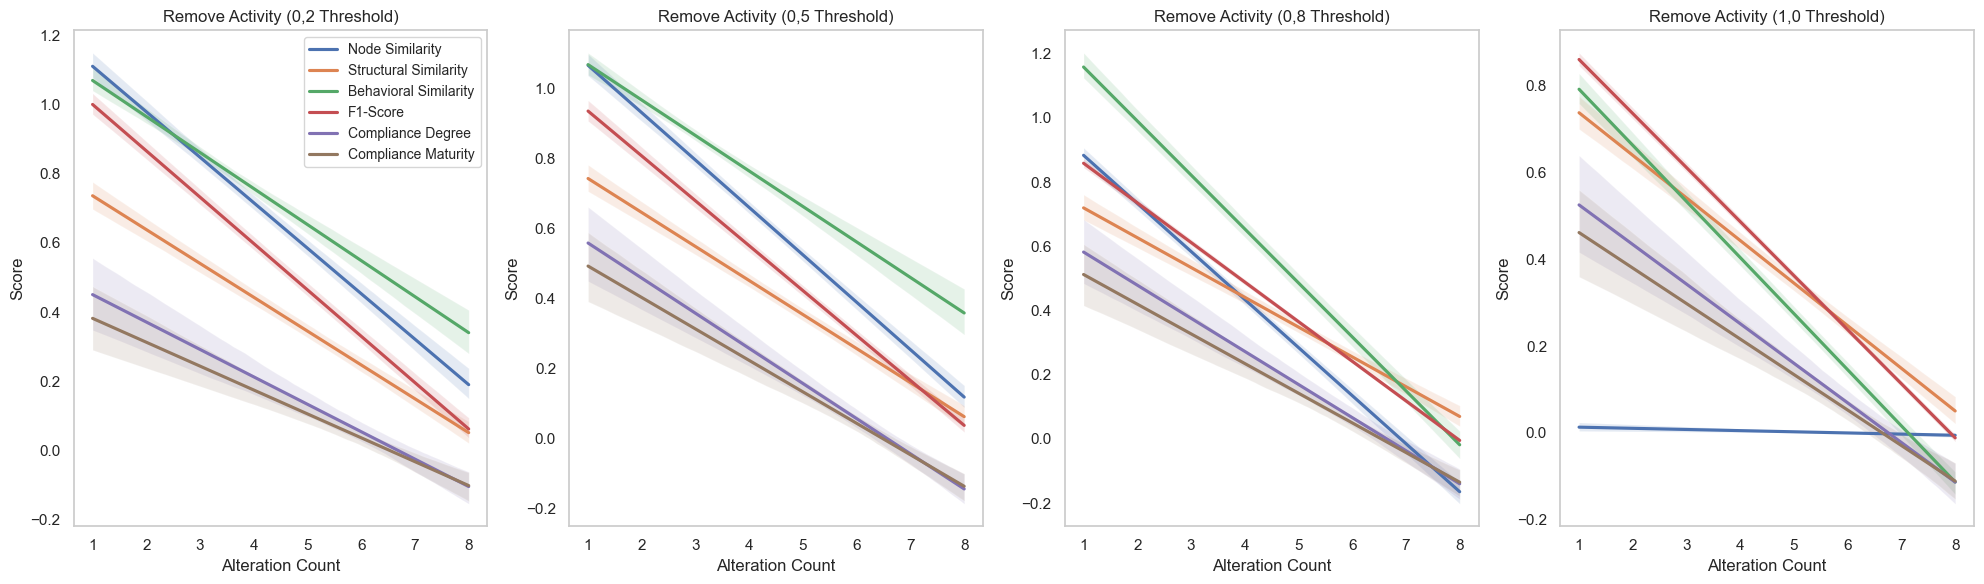

In [70]:
file_paths_remove_activity_thresholds = {
    "Remove Activity (0,2 Threshold)": "C:/Users/HP/OneDrive/Documents/Projects/metrics_implementation/tool/csv/test_remove_activity_02_thres.csv",
    "Remove Activity (0,5 Threshold)": "C:/Users/HP/OneDrive/Documents/Projects/metrics_implementation/tool/csv/test_remove_activity_05_thres.csv",
    "Remove Activity (0,8 Threshold)": "C:/Users/HP/OneDrive/Documents/Projects/metrics_implementation/tool/csv/test_remove_flowNode_new.csv",
    "Remove Activity (1,0 Threshold)": "C:/Users/HP/OneDrive/Documents/Projects/metrics_implementation/tool/csv/test_remove_activity_1_thres.csv"
    # "Remove Gateway": "C:/Users/HP/OneDrive/Documents/Projects/metrics_implementation/tool/csv/test_remove_gateway_new.csv"
}


columns_to_plot = ["Node Similarity","Structural Similarity","Behavioral Similarity", "F1-Score", "Compliance Degree", "Compliance Maturity"] # 


datasets_remove_activity = {key: pd.read_csv(path) for key, path in file_paths_remove_activity_thresholds.items()}


fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 6), sharex=True) 
axes = axes.flatten()

for plot_index, (ax, (title, df)) in enumerate(zip(axes, datasets_remove_activity.items())):
    for col in columns_to_plot:
        sns.regplot(x=df["Alteration Count"], y=df[col], ax=ax, label=col, scatter=False)
    ax.set_title(title)
    ax.set_ylabel("Score")
    ax.grid(False)
    
    if plot_index == 0:
        ax.legend(fontsize="small")
    else:
        legend = ax.get_legend()
        if legend:
            legend.remove()

plt.tight_layout()
plt.show()


In [ ]:
columns_to_plot = [
    "Node Similarity", 
    "Structural Similarity", 
    "Behavioral Similarity", 
    "F1-Score", 
    "Compliance Degree", 
    "Compliance Maturity"
]

# 2) Load data
datasets_remove_activity = {
    name: pd.read_csv(path) 
    for name, path in file_paths_remove_activity_thresholds.items()
}

# 3) Build the columns of the final table
#    We'll have one row per (threshold dataset), and for each metric 
#    we store slope, intercept, r_value, p_value, std_err
table_columns = ["Alteration + Threshold"]
for metric in columns_to_plot:
    table_columns += [
        f"{metric} Slope",
        f"{metric} Intercept",
        f"{metric} r_value",
        f"{metric} p_value",
        f"{metric} std_err"
    ]

# 4) Prepare an empty result DataFrame
df_result = pd.DataFrame(columns=table_columns)

# 5) Compute regression stats for each dataset + metric
for dataset_name, df in datasets_remove_activity.items():
    row_values = [dataset_name]  # first cell of the row = e.g. "Add Activity (0,2 Threshold)"
    for metric in columns_to_plot:
        slope, intercept, r_value, p_value, std_err = linregress(
            df["Alteration Count"], df[metric]
        )
        row_values += [slope, intercept, r_value, p_value, std_err]
    df_result.loc[len(df_result)] = row_values

# 6) Print or save the final table
print(df_result)

df_result.to_csv("remove_activity_diff_thresholds.csv")


            Alteration + Threshold  Node Similarity Slope  \
0  Remove Activity (0,2 Threshold)              -0.131365   
1  Remove Activity (0,5 Threshold)              -0.135378   
2  Remove Activity (0,8 Threshold)              -0.149699   
3  Remove Activity (1,0 Threshold)              -0.002667   

   Node Similarity Intercept  Node Similarity r_value  \
0                   1.241369                -0.892748   
1                   1.201739                -0.925667   
2                   1.032943                -0.947162   
3                   0.016000                -0.268635   

   Node Similarity p_value  Node Similarity std_err  \
0             1.754304e-70                 0.004712   
1             1.610015e-85                 0.003932   
2            9.979881e-100                 0.003603   
3             1.199616e-04                 0.000680   

   Structural Similarity Slope  Structural Similarity Intercept  \
0                    -0.097749                         0.833856  

**Reasoning**

----

### 3.3 Change Label

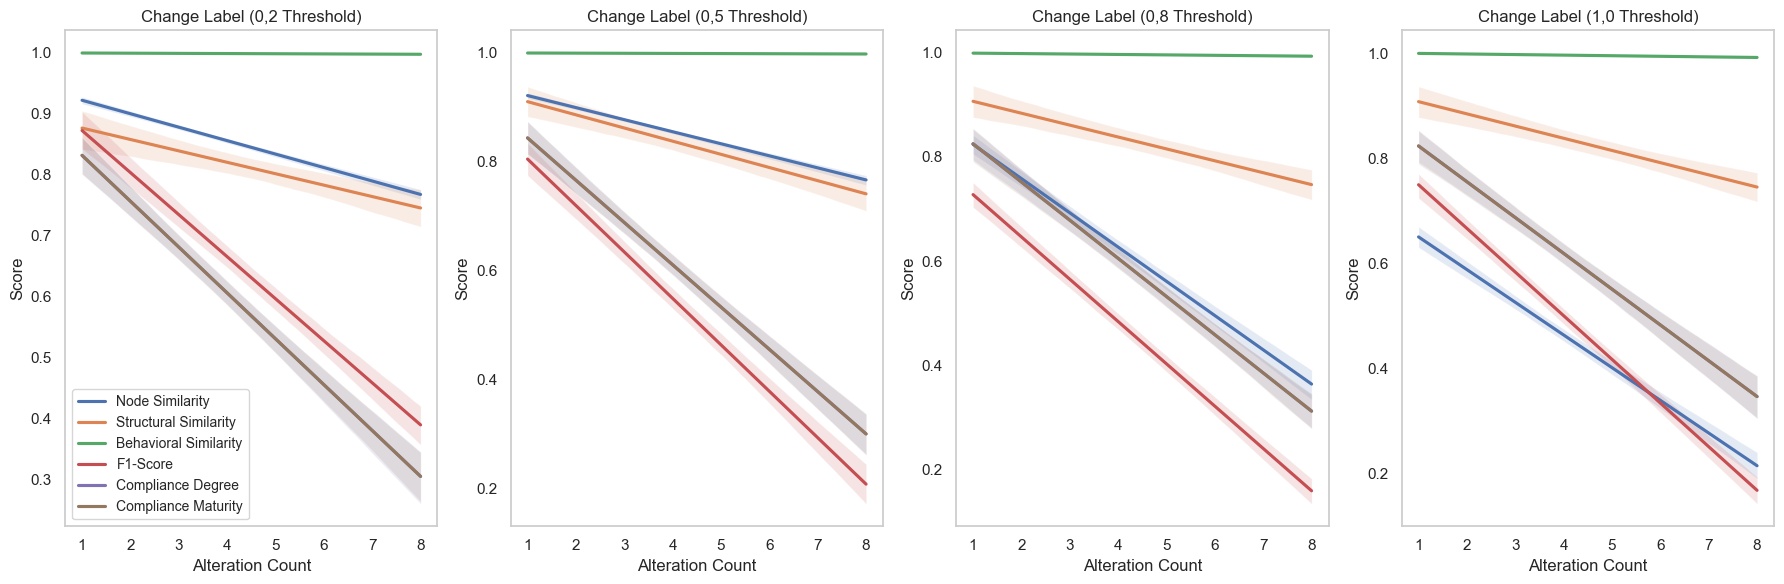

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_paths_change_label_thresholds = {
    "Change Label (0,2 Threshold)": "C:/Users/HP/OneDrive/Documents/Projects/metrics_implementation/tool/csv/test_change_label_02_thres.csv",
    "Change Label (0,5 Threshold)": "C:/Users/HP/OneDrive/Documents/Projects/metrics_implementation/tool/csv/test_change_label_05_thres.csv",
    "Change Label (0,8 Threshold)": "C:/Users/HP/OneDrive/Documents/Projects/metrics_implementation/tool/csv/test_change_label_new.csv",
    "Change Label (1,0 Threshold)": "C:/Users/HP/OneDrive/Documents/Projects/metrics_implementation/tool/csv/test_change_label_1_thres.csv"
}

columns_to_plot = ["Node Similarity","Structural Similarity", "Behavioral Similarity", "F1-Score", "Compliance Degree", "Compliance Maturity"]

datasets_change_label = {key: pd.read_csv(path) for key, path in file_paths_change_label_thresholds.items()}

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(18, 6), sharex=True) 
axes = axes.flatten()

for plot_index, (ax, (title, df)) in enumerate(zip(axes, datasets_change_label.items())):
    for col in columns_to_plot:
        sns.regplot(x=df["Alteration Count"], y=df[col], ax=ax, label=col, scatter=False)
    ax.set_title(title)
    ax.set_ylabel("Score")
    ax.grid(False)
    
    if plot_index == 0:
        ax.legend(fontsize="small")
    else:
        legend = ax.get_legend()
        if legend:
            legend.remove()

plt.tight_layout()
plt.show()


In [72]:
columns_to_plot = [
    "Node Similarity", 
    "Structural Similarity", 
    "Behavioral Similarity", 
    "F1-Score", 
    "Compliance Degree", 
    "Compliance Maturity"
]

# 2) Load data
datasets_change_label = {
    name: pd.read_csv(path) 
    for name, path in file_paths_change_label_thresholds.items()
}

# 3) Build the columns of the final table
#    We'll have one row per (threshold dataset), and for each metric 
#    we store slope, intercept, r_value, p_value, std_err
table_columns = ["Alteration + Threshold"]
for metric in columns_to_plot:
    table_columns += [
        f"{metric} Slope",
        f"{metric} Intercept",
        f"{metric} r_value",
        f"{metric} p_value",
        f"{metric} std_err"
    ]

# 4) Prepare an empty result DataFrame
df_result = pd.DataFrame(columns=table_columns)

# 5) Compute regression stats for each dataset + metric
for dataset_name, df in datasets_change_label.items():
    row_values = [dataset_name]  # first cell of the row = e.g. "Add Activity (0,2 Threshold)"
    for metric in columns_to_plot:
        slope, intercept, r_value, p_value, std_err = linregress(
            df["Alteration Count"], df[metric]
        )
        row_values += [slope, intercept, r_value, p_value, std_err]
    df_result.loc[len(df_result)] = row_values

# 6) Print or save the final table
print(df_result)

df_result.to_csv("change_label_diff_thresholds.csv")


         Alteration + Threshold  Node Similarity Slope  \
0  Change Label (0,2 Threshold)              -0.022073   
1  Change Label (0,5 Threshold)              -0.022095   
2  Change Label (0,8 Threshold)              -0.065808   
3  Change Label (1,0 Threshold)              -0.062262   

   Node Similarity Intercept  Node Similarity r_value  \
0                   0.943786                -0.868959   
1                   0.943120                -0.876347   
2                   0.890100                -0.832752   
3                   0.712679                -0.846345   

   Node Similarity p_value  Node Similarity std_err  \
0             2.113451e-62                 0.000893   
1             9.911607e-65                 0.000863   
2             9.806347e-53                 0.003109   
3             4.547816e-56                 0.002785   

   Structural Similarity Slope  Structural Similarity Intercept  \
0                    -0.018731                         0.894863   
1            

**Reasoning**

----

### 3.4 Add Flow

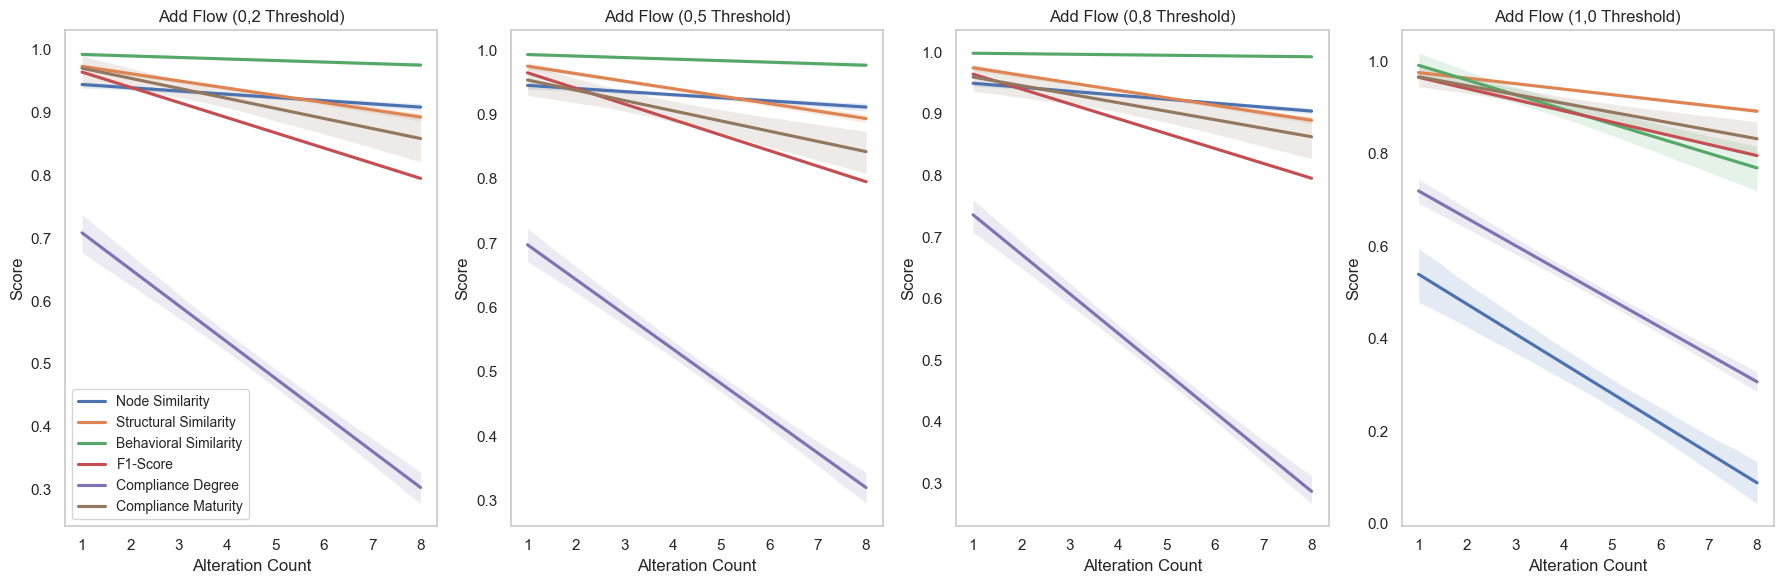

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_paths_add_flow_thresholds = {
    "Add Flow (0,2 Threshold)": "C:/Users/HP/OneDrive/Documents/Projects/metrics_implementation/tool/csv/test_add_flow_02_thres.csv",
    "Add Flow (0,5 Threshold)": "C:/Users/HP/OneDrive/Documents/Projects/metrics_implementation/tool/csv/test_add_flow_05_thres.csv",
    "Add Flow (0,8 Threshold)": "C:/Users/HP/OneDrive/Documents/Projects/metrics_implementation/tool/csv/test_add_flow_new.csv",
    "Add Flow (1,0 Threshold)": "C:/Users/HP/OneDrive/Documents/Projects/metrics_implementation/tool/csv/test_add_flow_1_thres.csv"
}

columns_to_plot = ["Node Similarity", "Structural Similarity", "Behavioral Similarity", "F1-Score", "Compliance Degree", "Compliance Maturity"]

datasets_add_flow = {key: pd.read_csv(path) for key, path in file_paths_add_flow_thresholds.items()}

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(18, 6), sharex=True)
axes = axes.flatten()

for plot_index, (ax, (title, df)) in enumerate(zip(axes, datasets_add_flow.items())):
    for col in columns_to_plot:
        sns.regplot(x=df["Alteration Count"], y=df[col], ax=ax, label=col, scatter=False)
    ax.set_title(title)
    ax.set_ylabel("Score")
    ax.grid(False)
    
    if plot_index == 0:
        ax.legend(fontsize="small")
    else:
        legend = ax.get_legend()
        if legend:
            legend.remove()

plt.tight_layout()
plt.show()


In [55]:
columns_to_plot = [
    "Node Similarity", 
    "Structural Similarity", 
    "Behavioral Similarity", 
    "F1-Score", 
    "Compliance Degree", 
    "Compliance Maturity"
]

# 2) Load data
datasets_add_flow = {
    name: pd.read_csv(path) 
    for name, path in file_paths_add_flow_thresholds.items()
}

# 3) Build the columns of the final table
#    We'll have one row per (threshold dataset), and for each metric 
#    we store slope, intercept, r_value, p_value, std_err
table_columns = ["Alteration + Threshold"]
for metric in columns_to_plot:
    table_columns += [
        f"{metric} Slope",
        f"{metric} Intercept",
        f"{metric} r_value",
        f"{metric} p_value",
        f"{metric} std_err"
    ]

# 4) Prepare an empty result DataFrame
df_result = pd.DataFrame(columns=table_columns)

# 5) Compute regression stats for each dataset + metric
for dataset_name, df in datasets_add_flow.items():
    row_values = [dataset_name]  # first cell of the row = e.g. "Add Activity (0,2 Threshold)"
    for metric in columns_to_plot:
        slope, intercept, r_value, p_value, std_err = linregress(
            df["Alteration Count"], df[metric]
        )
        row_values += [slope, intercept, r_value, p_value, std_err]
    df_result.loc[len(df_result)] = row_values

# 6) Print or save the final table
print(df_result)

df_result.to_csv("add_flow_diff_thresholds.csv")


     Alteration + Threshold  Node Similarity Slope  Node Similarity Intercept  \
0  Add Flow (0,2 Threshold)              -0.005136                   0.950125   
1  Add Flow (0,5 Threshold)              -0.004961                   0.948566   
2  Add Flow (0,8 Threshold)              -0.006464                   0.956423   
3  Add Flow (1,0 Threshold)              -0.068333                   0.595000   

   Node Similarity r_value  Node Similarity p_value  Node Similarity std_err  \
0                -0.473782             1.382139e-12                 0.000678   
1                -0.433270             1.472573e-10                 0.000733   
2                -0.584199             1.079601e-19                 0.000638   
3                -0.578383             2.995815e-19                 0.006849   

   Structural Similarity Slope  Structural Similarity Intercept  \
0                    -0.011508                         0.985341   
1                    -0.011112                         0.98


----

### 3.5 Remove Flow

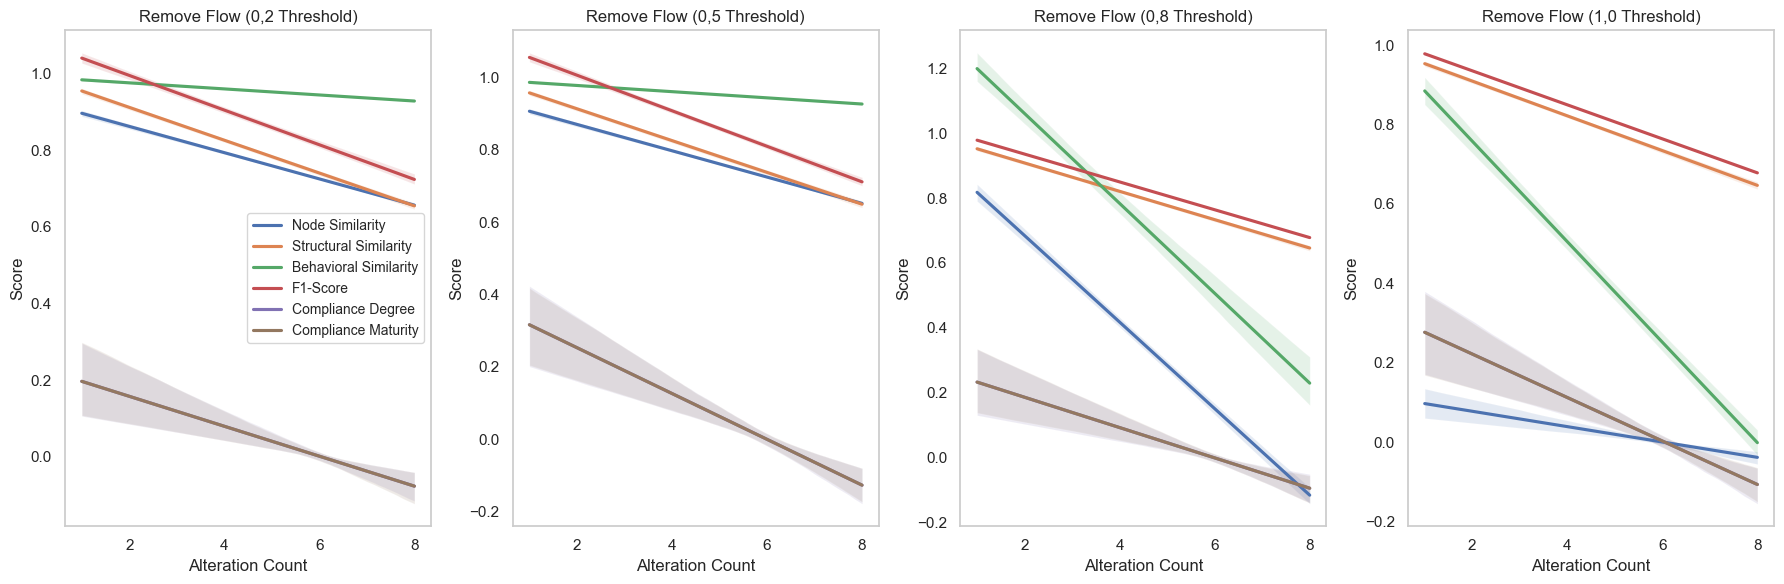

In [54]:
file_paths_remove_flow_thresholds = {
    "Remove Flow (0,2 Threshold)": "C:/Users/HP/OneDrive/Documents/Projects/metrics_implementation/tool/csv/test_remove_flow_02_thres.csv",
    "Remove Flow (0,5 Threshold)": "C:/Users/HP/OneDrive/Documents/Projects/metrics_implementation/tool/csv/test_remove_flow_05_thres.csv",
    "Remove Flow (0,8 Threshold)": "C:/Users/HP/OneDrive/Documents/Projects/metrics_implementation/tool/csv/test_remove_flow_new.csv",
    "Remove Flow (1,0 Threshold)": "C:/Users/HP/OneDrive/Documents/Projects/metrics_implementation/tool/csv/test_remove_flow_1_thres.csv"
}


columns_to_plot = ["Node Similarity","Structural Similarity","Behavioral Similarity", "F1-Score", "Compliance Degree", "Compliance Maturity"]


datasets_remove_flow = {key: pd.read_csv(path) for key, path in file_paths_remove_flow_thresholds.items()}


fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(18, 6), sharex=True) 
axes = axes.flatten()

for plot_index, (ax, (title, df)) in enumerate(zip(axes, datasets_remove_flow.items())):
    for col in columns_to_plot:
        sns.regplot(x=df["Alteration Count"], y=df[col], ax=ax, label=col, scatter=False)
    ax.set_title(title)
    ax.set_ylabel("Score")
    ax.grid(False)
    
    if plot_index == 0:
        ax.legend(fontsize="small")
    else:
        legend = ax.get_legend()
        if legend:
            legend.remove()

plt.tight_layout()
plt.show()


In [62]:
0.9 >= 1.0

False

In [53]:
columns_to_plot = [
    "Node Similarity", 
    "Structural Similarity", 
    "Behavioral Similarity", 
    "F1-Score", 
    "Compliance Degree", 
    "Compliance Maturity"
]

# 2) Load data
datasets_remove_flow = {
    name: pd.read_csv(path) 
    for name, path in file_paths_remove_flow_thresholds.items()
}

# 3) Build the columns of the final table
#    We'll have one row per (threshold dataset), and for each metric 
#    we store slope, intercept, r_value, p_value, std_err
table_columns = ["Alteration + Threshold"]
for metric in columns_to_plot:
    table_columns += [
        f"{metric} Slope",
        f"{metric} Intercept",
        f"{metric} r_value",
        f"{metric} p_value",
        f"{metric} std_err"
    ]

# 4) Prepare an empty result DataFrame
df_result = pd.DataFrame(columns=table_columns)

# 5) Compute regression stats for each dataset + metric
for dataset_name, df in datasets_remove_flow.items():
    row_values = [dataset_name]  # first cell of the row = e.g. "Add Activity (0,2 Threshold)"
    for metric in columns_to_plot:
        slope, intercept, r_value, p_value, std_err = linregress(
            df["Alteration Count"], df[metric]
        )
        row_values += [slope, intercept, r_value, p_value, std_err]
    df_result.loc[len(df_result)] = row_values

# 6) Print or save the final table
print(df_result)

df_result.to_csv("remove_flow_diff_thresholds.csv")


        Alteration + Threshold  Node Similarity Slope  \
0  Remove Flow (0,2 Threshold)              -0.034237   
1  Remove Flow (0,5 Threshold)              -0.036396   
2  Remove Flow (0,8 Threshold)              -0.133196   
3  Remove Flow (1,0 Threshold)              -0.019345   

   Node Similarity Intercept  Node Similarity r_value  \
0                   0.930102                -0.961759   
1                   0.943293                -0.969258   
2                   0.950811                -0.945338   
3                   0.116429                -0.446839   

   Node Similarity p_value  Node Similarity std_err  \
0            2.581547e-113                 0.000693   
1            1.540859e-122                 0.000657   
2             2.619508e-98                 0.003265   
3             3.299936e-11                 0.002752   

   Structural Similarity Slope  Structural Similarity Intercept  \
0                    -0.042819                         0.996885   
1                 

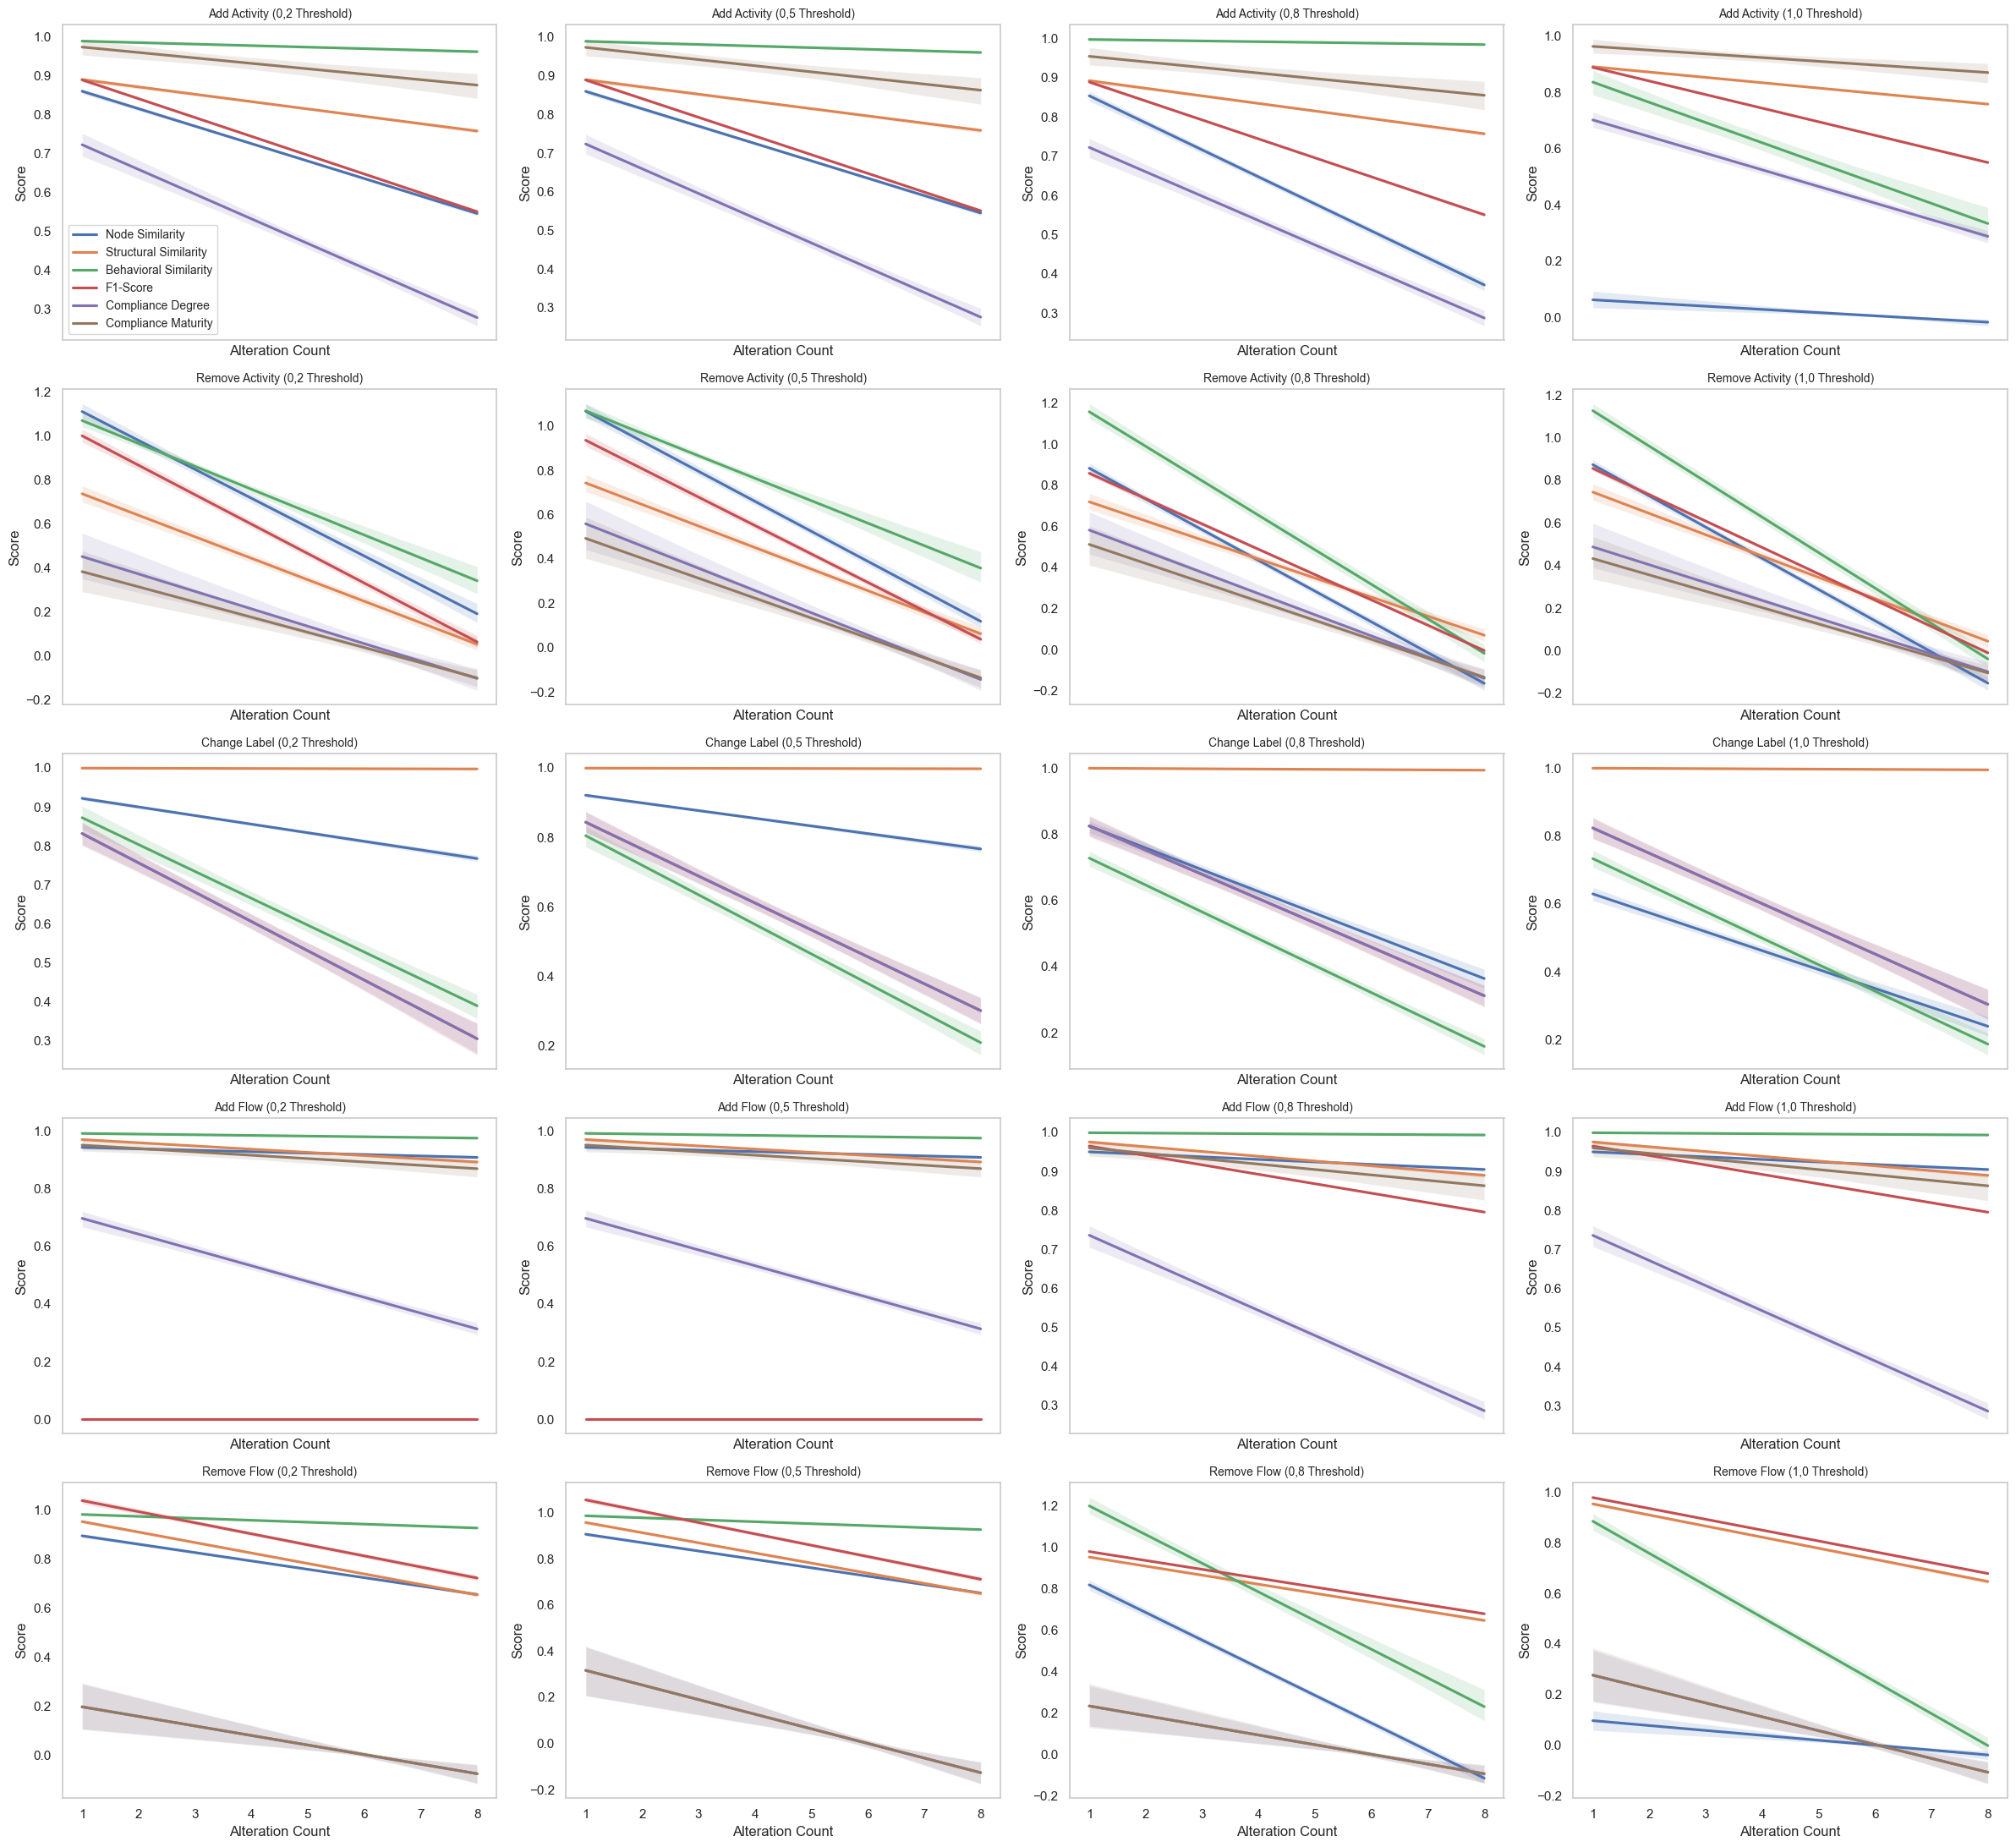

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# All datasets with file paths and columns to plot
all_datasets = {
    "Add Activity": {
        "Add Activity (0,2 Threshold)": "C:/Users/HP/OneDrive/Documents/Projects/metrics_implementation/tool/csv/test_add_activity_02_thres.csv",
        "Add Activity (0,5 Threshold)": "C:/Users/HP/OneDrive/Documents/Projects/metrics_implementation/tool/csv/test_add_activity_new_0_5_threshold.csv",
        "Add Activity (0,8 Threshold)": "C:/Users/HP/OneDrive/Documents/Projects/metrics_implementation/tool/csv/test_add_activity_new.csv",
        "Add Activity (1,0 Threshold)": "C:/Users/HP/OneDrive/Documents/Projects/metrics_implementation/tool/csv/test_add_activity_1_thres.csv",
        "columns": ["Node Similarity","Structural Similarity", "Behavioral Similarity", "F1-Score", "Compliance Degree", "Compliance Maturity"]
    },
    "Remove Activity": {
        "Remove Activity (0,2 Threshold)": "C:/Users/HP/OneDrive/Documents/Projects/metrics_implementation/tool/csv/test_remove_activity_02_thres.csv",
        "Remove Activity (0,5 Threshold)": "C:/Users/HP/OneDrive/Documents/Projects/metrics_implementation/tool/csv/test_remove_activity_05_thres.csv",
        "Remove Activity (0,8 Threshold)": "C:/Users/HP/OneDrive/Documents/Projects/metrics_implementation/tool/csv/test_remove_flowNode_new.csv",
        "Remove Activity (1,0 Threshold)": "C:/Users/HP/OneDrive/Documents/Projects/metrics_implementation/tool/csv/test_remove_activity_1_thres.csv",
        "columns": ["Node Similarity","Structural Similarity", "Behavioral Similarity", "F1-Score", "Compliance Degree", "Compliance Maturity"]
    },
    "Change Label": {
        "Change Label (0,2 Threshold)": "C:/Users/HP/OneDrive/Documents/Projects/metrics_implementation/tool/csv/test_change_label_02_thres.csv",
        "Change Label (0,5 Threshold)": "C:/Users/HP/OneDrive/Documents/Projects/metrics_implementation/tool/csv/test_change_label_05_thres.csv",
        "Change Label (0,8 Threshold)": "C:/Users/HP/OneDrive/Documents/Projects/metrics_implementation/tool/csv/test_change_label_new.csv",
        "Change Label (1,0 Threshold)": "C:/Users/HP/OneDrive/Documents/Projects/metrics_implementation/tool/csv/test_change_label_1_thress.csv",
        "columns": ["Node Similarity","Behavioral Similarity", "F1-Score", "Compliance Degree", "Compliance Maturity"]
    },
    "Add Flow": {
        "Add Flow (0,2 Threshold)": "C:/Users/HP/OneDrive/Documents/Projects/metrics_implementation/tool/csv/test_add_flow_05_thres.csv",
        "Add Flow (0,5 Threshold)": "C:/Users/HP/OneDrive/Documents/Projects/metrics_implementation/tool/csv/test_add_flow_05_thres.csv",
        "Add Flow (0,8 Threshold)": "C:/Users/HP/OneDrive/Documents/Projects/metrics_implementation/tool/csv/test_add_flow_new.csv",
        "Add Flow (1,0 Threshold)": "C:/Users/HP/OneDrive/Documents/Projects/metrics_implementation/tool/csv/test_add_flow_new.csv",
        "columns": ["Node Similarity","Structural Similarity","Behavioral Similarity", "F1-Score", "Compliance Degree", "Compliance Maturity"]
    },
    "Remove Flow": {
        "Remove Flow (0,2 Threshold)": "C:/Users/HP/OneDrive/Documents/Projects/metrics_implementation/tool/csv/test_remove_flow_02_thres.csv",
        "Remove Flow (0,5 Threshold)": "C:/Users/HP/OneDrive/Documents/Projects/metrics_implementation/tool/csv/test_remove_flow_05_thres.csv",
        "Remove Flow (0,8 Threshold)": "C:/Users/HP/OneDrive/Documents/Projects/metrics_implementation/tool/csv/test_remove_flow_new.csv",
        "Remove Flow (1,0 Threshold)": "C:/Users/HP/OneDrive/Documents/Projects/metrics_implementation/tool/csv/test_remove_flow_1_thres.csv",
        "columns": ["Node Similarity","Structural Similarity","Behavioral Similarity", "F1-Score", "Compliance Degree", "Compliance Maturity"]
    }
}

# Create unified grid plot
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(24, 22), sharex=True)
axes = axes.flatten()
plot_index = 0

for alteration_type, config in all_datasets.items():
    for title, file_path in config.items():
        if title == "columns":
            continue
        df = pd.read_csv(file_path)
        ax = axes[plot_index]
        for col in config["columns"]:
            sns.regplot(x="Alteration Count", y=col, data=df, ax=ax, label=col, scatter=False)
        ax.set_title(title, fontsize=10)
        ax.set_ylabel("Score")
        ax.grid(False)
        if plot_index == 0:
            ax.legend(fontsize="small")
        else:
            legend = ax.get_legend()
            if legend:
                legend.remove()

        plot_index += 1

plt.tight_layout()
plt.show()



----

### how does each metric tackle the perspectives

- Behavioral similarity:
    - Functional Perspective ✔️ 
    
    - Data and Dataflow Perspective ❌

    - Organizational Perspective ❌
    
    - Operational Perspective ❌

    - Behavioral Perspective ✔️


- F1 Score:
    - Functional Perspective ✔️ 
    
    - Data and Dataflow Perspective ❌

    - Organizational Perspective ❌
    
    - Operational Perspective ❌

    - Behavioral Perspective ❌


- Compliance Degree:
    - Functional Perspective ✔️ 
    
    - Data and Dataflow Perspective ❌

    - Organizational Perspective ❌
    
    - Operational Perspective ❌

    - Behavioral Perspective ✔️ 




------

### welche Komibination von Metriken wäre sinnvoll? correlation?

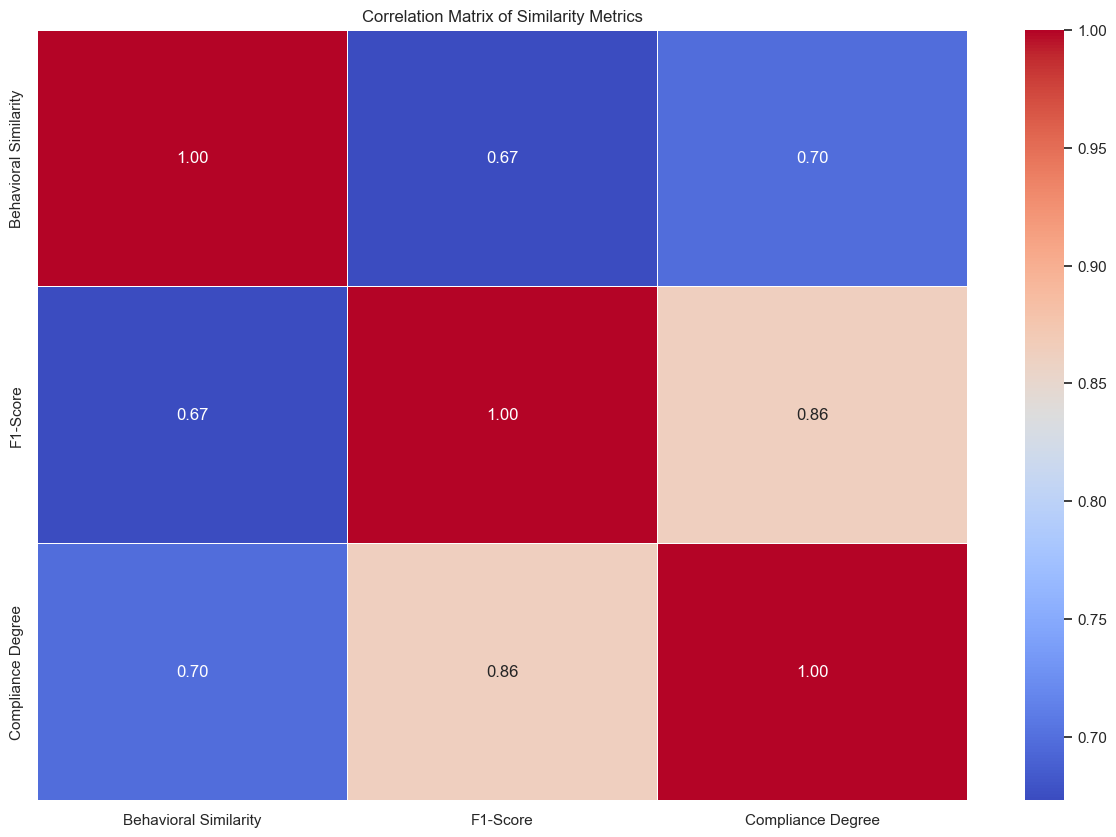

In [43]:

metrics_to_compare = [ "Behavioral Similarity", "F1-Score", "Compliance Degree"] # , "Node Similarity", "Structural Similarity", "Compliance Maturity"

correlation_matrix = df_add_activity[metrics_to_compare].corr()

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Similarity Metrics")
plt.show()


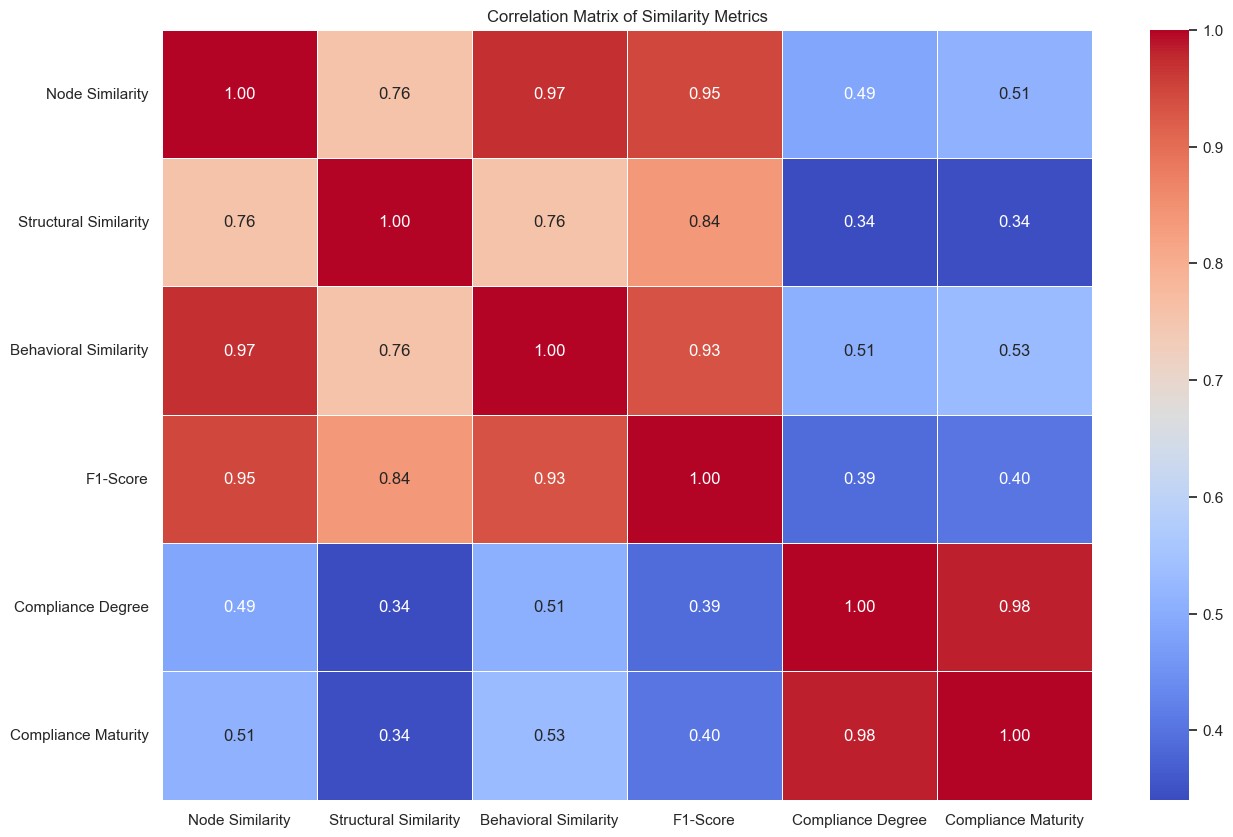

In [44]:


metrics_to_compare = ["Node Similarity", "Structural Similarity", "Behavioral Similarity", "F1-Score", "Compliance Degree", "Compliance Maturity"]

correlation_matrix = df_remove_activity[metrics_to_compare].corr()

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Similarity Metrics")
plt.show()


-----

-----